<a href="https://colab.research.google.com/github/cweiqiang/wq.github.io/blob/main/Datacamp_Working_with_Geospatial_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Description

A good proportion of the data out there in the real world is inherently spatial. From the population recorded in the national census, to every shop in your neighborhood, the majority of datasets have a location aspect that you can exploit to make the most of what they have to offer. This course will show you how to integrate spatial data into your Python Data Science workflow. You will learn how to interact with, manipulate and augment real-world data using their geographic dimension. You will learn to read tabular spatial data in the most common formats (e.g. GeoJSON, shapefile, geopackage) and visualize them in maps. You will then combine different sources using their location as the bridge that puts them in relation to each other. And, by the end of the course, you will be able to understand what makes geographic data unique, allowing you to transform and repurpose them in different contexts.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
cd /gdrive/MyDrive/Datacamp-Course-Slides/Working-with-Geospatial-Data-in-Python

/gdrive/MyDrive/Datacamp-Course-Slides/Working-with-Geospatial-Data-in-Python


In [ ]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 

In [ ]:
!pip install geopandas==0.10.0
# Install descartes - Geopandas requirement
!pip install descartes 

In [ ]:
!pip install folium

In [ ]:
!pip install contextily

In [9]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chapter 1: Introduction to geospatial vector data

In this chapter, you will be introduced to the concepts of geospatial data, and more specifically of vector data. You will then learn how to represent such data in Python using the GeoPandas library, and the basics to read, explore and visualize such data. And you will exercise all this with some datasets about the city of Paris. Refer to [slides of Chapter 1 here](https://drive.google.com/file/d/1nK0PgHQ9c-f_J3F75DGc7dxGxGTDh8h4/view?usp=sharing)

In [6]:
ls

 Chapter1_Intro_to_Geospatial_data.pdf
'chapter2- Spatial relationships.pdf'
 _chapter2-trees_by_district.csv
'chapter3- Projecting and transforming geometries.pdf'
'chapter4-Putting it all together - Artisanal mining sites case study .pdf'
 ipis_cod_mines.geojson
 ipis_cod_mines_utm.gpkg
 paris_districts_utm.geojson
 paris_restaurants.csv
 paris_sharing_bike_stations_utm.geojson
 paris_trees_small.gpkg


## 1.1. Restaurants in Paris
Throughout the exercises in this course, we will work with several datasets about the city of Paris.

In this exercise, we will start with exploring a dataset about the restaurants in the center of Paris (compiled from a Paris Data open dataset). The data contains the coordinates of the point locations of the restaurants and a description of the type of restaurant.

We expect that you are familiar with the basics of the pandas library to work with tabular data (`DataFrame` objects) in Python. Here, we will use pandas to read the provided csv file, and then use matplotlib to make a visualization of the points. 


With matplotlib, we first create a figure and axes object with `fig, ax = plt.subplots()`, and then use this axes object `ax` to create the plot.

---

- Import `pandas as pd` and `matplotlib.pyplot` as `plt`.

- Read the restaurants dataset `("paris_restaurants.csv")` and assign it to a variable called `restaurants`.

- Inspect the first 5 rows of the df dataframe with the `head()` method. Do you see the columns with coordinates?

- Make a quick visualization of the locations of the districts using the `matplotlib plot()` method.

                                 type              x             y
0                 European restuarant  259641.691646  6.251867e+06
1       Traditional French restaurant  259572.339603  6.252030e+06
2       Traditional French restaurant  259657.276374  6.252143e+06
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4       Traditional French restaurant  259597.943086  6.252230e+06


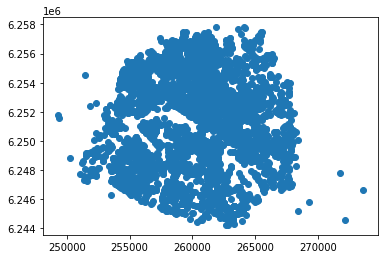

In [10]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the restaurants csv file
restaurants = pd.read_csv("paris_restaurants.csv")

# Inspect the first rows of restaurants
print(restaurants.head())

# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o')
plt.show()

## 1.2. Adding a background map

A plot with just some points can be hard to interpret without any spatial context. Therefore, in this exercise we will learn how to add a background map.

We are going to make use of the `contextily` package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. 

We begin by plotting our data first, and then pass the matplotlib axes object to the `add_basemap()` function. 

`contextily` will then download the web tiles needed for the geographical extent of your plot.

To set the size of the plotted points, we can use the `markersize` keyword of the `plot()` method.

Pandas has been imported as `pd` and matplotlib's pyplot functionality as `plt`.

---

- Import `contextily`.

- Re-do the figure of the previous exercise: make a plot of all the points in `restaurant`.

- Set the marker size equal to 1 to reduce the size of the points.

- Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

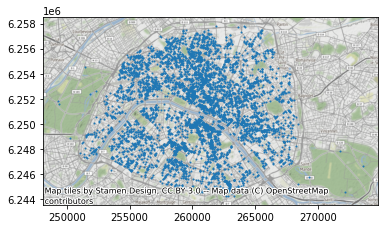

In [13]:
# Read the restaurants csv file
restaurants = pd.read_csv("paris_restaurants.csv")

# Import contextily
import contextily

# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

## 1.3. Introduction to GeoPandas/ Explore the Paris districts (I)

In this exercise, we introduce a next dataset about Paris: the administrative districts of Paris (compiled from a [Paris Data open dataset](https://opendata.paris.fr/explore/dataset/quartier_paris/)).

The dataset is available as a GeoPackage file, a specialised format to store geospatial vector data, and such a file can be read by GeoPandas using the `geopandas.read_file()` function.

To get a first idea of the dataset, we can inspect the first rows with `head()` and do a quick visualization with `plot()`. 

The attribute information about the districts included in the dataset is the district name and the population (total number of inhabitants of each district).

--- 

- Import GeoPandas.

- Read the districts file (`'paris_districts.gpkg'`) and assign it to a variable called districts.

- Print the first 5 rows of the `districts` dataset. What kind of geometries do those datasets contain?

- Make a quick visualization of districts.



   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


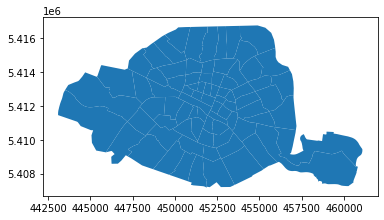

In [15]:
# Import GeoPandas
import geopandas

# Read the Paris districts dataset
# districts = geopandas.read_file('paris_districts.gpkg')
districts = geopandas.read_file('paris_districts_utm.geojson')
# Inspect the first rows
print(districts.head())

# Make a quick visualization of the districts
districts.plot()
plt.show()

## 1.4. Explore the Paris districts (II)

In the previous exercise, we used the customized `plot()` method of the GeoDataFrame, which produces a simple visualization of the geometries in the dataset. The GeoDataFrame and GeoSeries objects can be seen as "spatial-aware" DataFrame and Series objects, and compared to their pandas counterparts, they expose additional spatial-specific methods and attributes.

The `.geometry` attribute of a GeoDataFrame always returns the column with the geometry objects as a `GeoSeries`, whichever the actual name of the column (in the default case it will also be called 'geometry').

Another example of extra spatial functionality is the `area` attribute, giving the area of the polygons.

GeoPandas has been imported as `geopandas` and the districts dataset is available as the `districts` variable.

---
- Check what kind of object districts is with the `type()` function.

- Access the geometry attribute of the districts GeoDataFrame and print the type of this object.
- Show the first 5 rows of the geometry.
- Inspect the area of the districts's geometries.

In [16]:
# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts.geometry))

# Inspect the first rows of the geometry
print(districts.geometry.head())

# Inspect the area of the districts
print(districts.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((451922.133 5411438.484, 451922.080 5...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
3    POLYGON ((451004.908 5412654.095, 450960.640 5...
4    POLYGON ((451328.752 5412991.278, 451294.721 5...
Name: geometry, dtype: geometry
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


## 1.5. The Paris restaurants as a GeoDataFrame

In the first coding exercise of this chapter, we imported the locations of the restaurants in Paris from a csv file. To enable the geospatial functionality of GeoPandas, we want to convert the pandas DataFrame to a GeoDataFrame. This can be done with the `GeoDataFrame()` constructor and the `geopandas.points_from_xy`() function, and is done for you.

Now we have a GeoDataFrame, all spatial functionality becomes available, such as plotting the geometries. In this exercise we will make the same figure as in the first exercise with the restaurants dataset, but now using the GeoDataFrame's `plot()` method.

Pandas has been imported as `pd`, GeoPandas as `geopandas` and matplotlib's pyplot functionality as `plt`.

---
- Inspect the first rows of the restaurants GeoDataFrame.

- Plot it with the `plot()` method of the GeoDataFrame. The return value is a matplotlib axes object: call this `ax`.
- Again, make sure to set the `markersize` equal to 1.
- Add a basemap layer using `contextily`.

                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


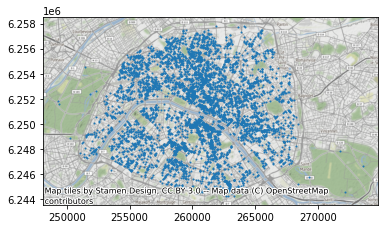

In [52]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head())

# Make a plot of the restaurants
ax = restaurants.plot(markersize=1)
import contextily
contextily.add_basemap(ax)
plt.show()

## 1.6. Exploring and visualizing spatial data/ Visualizing the population density

Let's get back to the districts dataset. In a previous exercise we visualized the districts with a uniform column. But often we want to show the spatial variation of a variable, and color the polygons accordingly.

In this exercise we will visualize the spatial variation of the population density within the center of Paris. For this, we will first calculate the population density by dividing the population number with the area, and add it as a new column to the dataframe.

The districts dataset is already loaded as `districts`, GeoPandas has been imported as `geopandas` and matplotlib.pyplot as `plt`.

---

- Print the first rows of the `districts` dataset. Do you see the `'population'` column?

- Inspect the area of the `districts`'s geometries.

- Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).

- Plot the `districts` using the `'population_density'` to color the polygons.

In [18]:
# Inspect the first rows of the districts dataset
print(districts.head())

# Inspect the area of the districts
print(districts.geometry.area)

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


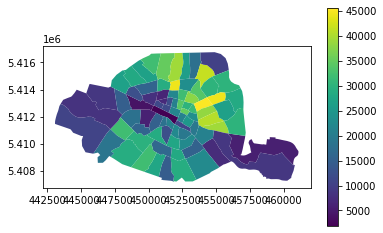

In [19]:
# Add a population density column
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

# Make a plot of the districts colored by the population density
districts.plot('population_density', legend=True)
plt.show()

## 1.7. Using pandas functionality: groupby

This course will focus on the spatial functionality of GeoPandas, but don't forget that we still have a dataframe, and all functionality you know from Pandas is still applicable.

In this exercise, we will recap a common functionality: the groupby operation. You may want to use this operation when you have a column containing groups, and you want to calculate a statistic for each group. In the `groupby()` method, you pass the column that contains the groups. On the resulting object, you can then call the method you want to calculate for each group. In this exercise, we want to know the size of each group of type of restaurants.

We refer to the course on Manipulating DataFrames with pandas for more information and exercises on this groupby operation.

---
- Using `groupby()`, group the restaurants by the *type* of restaurants, and calculate the size of each group. Call the result `type_counts`.

- Print the resulting Series.

In [21]:
# Load the restaurants data
# restaurants = geopandas.read_file("paris_restaurants.geosjon")
restaurants = pd.read_csv("paris_restaurants.csv")
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


## 1.8. Plotting multiple layers

Another typical pandas functionality is filtering a dataframe: taking a subset of the rows based on a condition (which generates a boolean mask).

In this exercise, we will take the subset of all African restaurants, and then make a multi-layered plot. In such a plot, we combine the visualization of several GeoDataFrames on a single figure. To add one layer, we can use the `ax` keyword of the `plot()` method of a GeoDataFrame to pass it a matplotlib axes object.

The restaurants data is already loaded as the `restaurants` GeoDataFrame. GeoPandas is imported as `geopandas` and matplotlib.pyplot as `plt`.

---
- Select a subset of all rows where the type is 'African restaurant'. Call this subset `african_restaurants`.

- Make a plot of all restaurants and use a uniform grey color. Remember to pass a matplotlib axes object to the `plot()` method.

- Add a second layer of only the African restaurants in red. For the typical colors, you can use English names such as 'red' and 'grey'.

- Remove the box using the `set_axis_off()` method on the matplotlib axes object.

In [ ]:
# Load the restaurants dataset
# restaurants = geopandas.read_file("paris_restaurants.geosjon")

# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants["type"]=='African restaurant']

# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax,color='grey')
african_restaurants.plot(ax=ax,color='red')
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

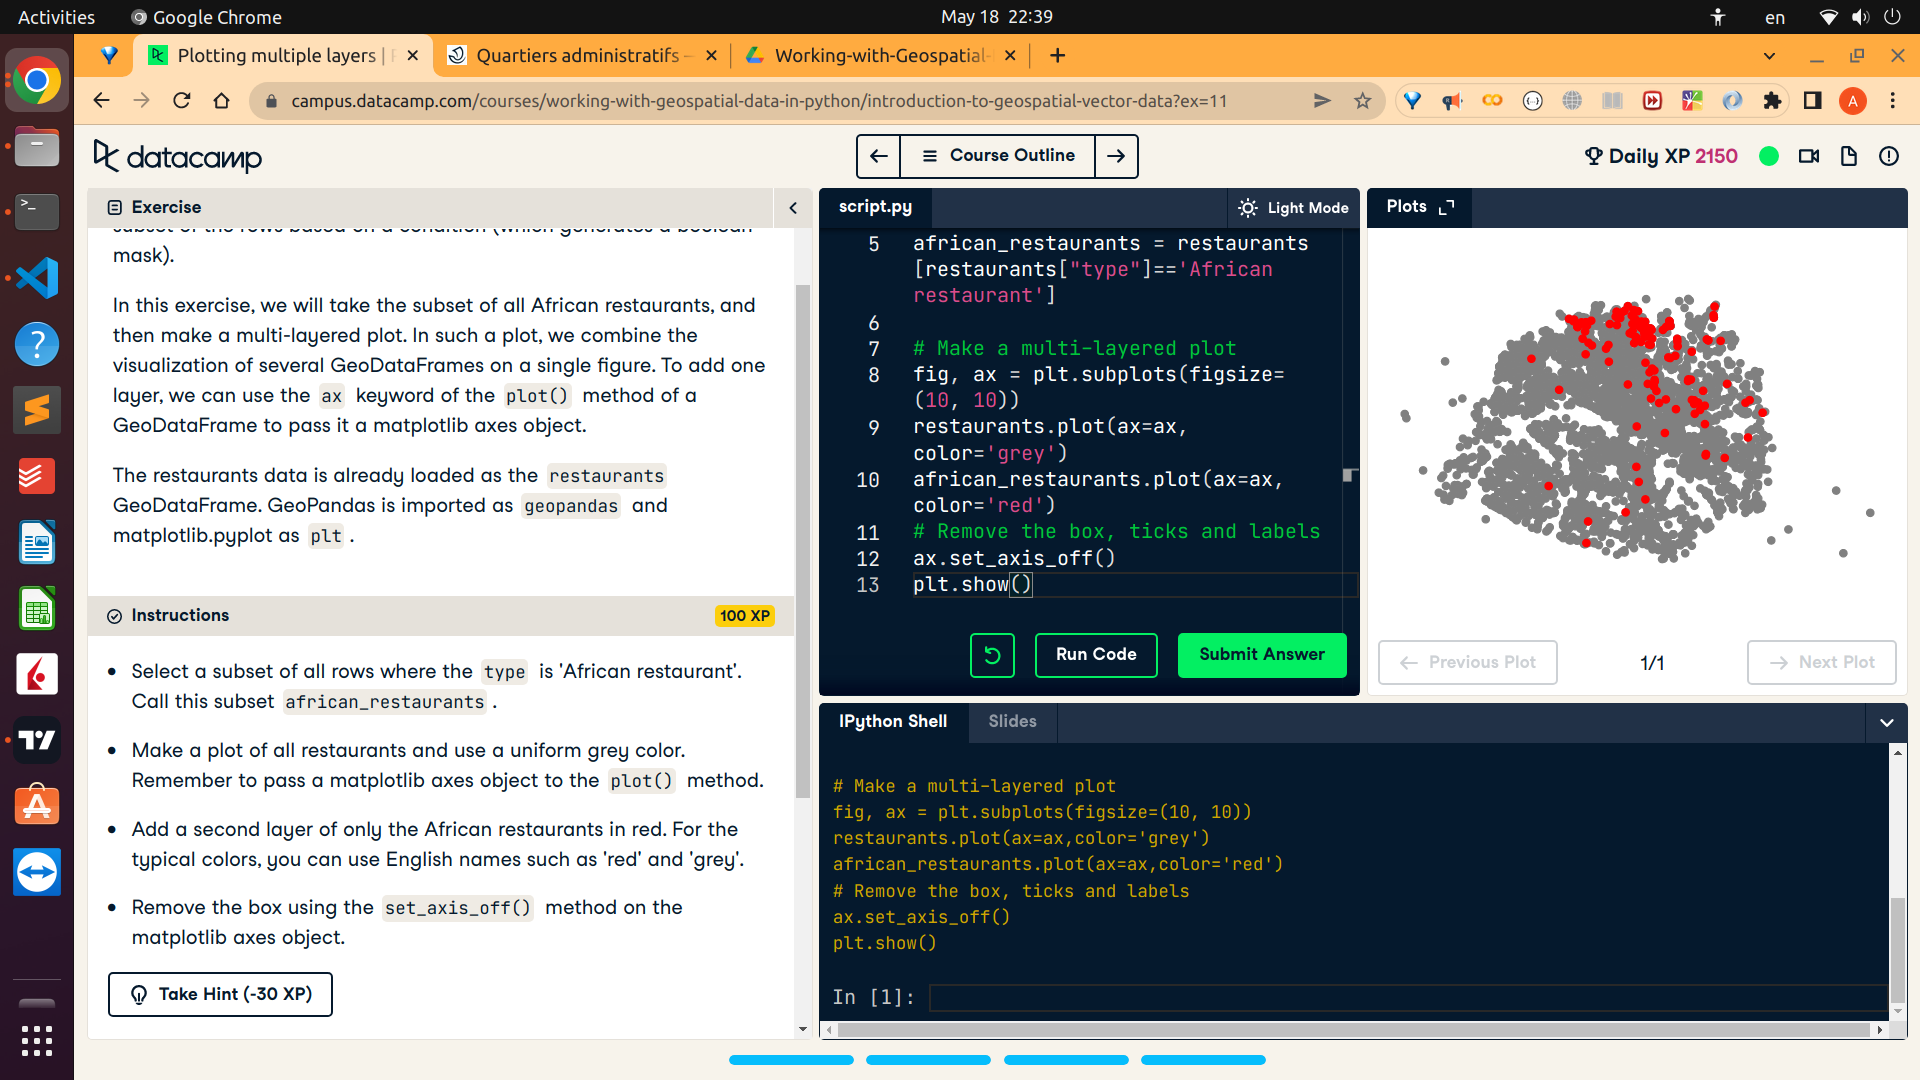

# Chapter 2: Spatial relationships

One of the key aspects of geospatial data is how they relate to each other in space. In this chapter, you will learn the different spatial relationships, and how to use them in Python to query the data or to perform spatial joins. Finally, you will also learn in more detail about choropleth visualizations.

Refer to [slides of Chapter 2 here](https://drive.google.com/file/d/1NPYdJFZr3guILvqGXA-8uQGhDm6GSNbQ/view?usp=sharing)

## 2.1. Shapely geometries and spatial relationships/ Creating a Point geometry

The Eiffel Tower is an iron lattice tower built in the 19th century, and is probably the most iconic view of Paris.

(By couscouschocolat [CC BY 2.0](https://creativecommons.org/licenses/by/2.0), via Wikimedia Commons)

The location of the Eiffel Tower is: x of 255422.6 and y of 6250868.9.

---
- Import the `Point` class from `shapely`.

- Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`.
Print the result.

In [23]:
# Import the Point geometry
from shapely.geometry import Point

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6,6250868.9)

# Print the result
print(eiffel_tower)

POINT (255422.6 6250868.9)


## 2.2. Shapely's spatial methods

Now we have a shapely `Point` object for the Eiffel Tower, we can use the different methods available on such a geometry object to perform spatial operations, such as calculating a distance or checking a spatial relationship.

We repeated the construction of `eiffel_tower`, and also provide the code that extracts one of the neighbourhoods (the Montparnasse district), as well as one of the restaurants located within Paris.

---

- Check if the Eiffel Tower is located within the Montparnasse district.

- Check if the Montparnasse district contains the restaurant location.

- Calculate the distance between the Eiffel Tower and the restaurant (note: in this case, the distance is returned in meters).

In [25]:
restaurants.head(2)

type              x             y
0            European restuarant  259641.691646  6.251867e+06
1  Traditional French restaurant  259572.339603  6.252030e+06

In [29]:
districts.loc[52,'district_name']

'Montparnasse'

In [48]:
districts.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
districts=districts.to_crs(epsg=3857)

In [53]:
restaurants.head(2)

type              x             y  \
0            European restuarant  259641.691646  6.251867e+06   
1  Traditional French restaurant  259572.339603  6.252030e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)

In [54]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']
# resto=Point(258904.2000192164, 6248127.313325831)

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto))

False
True
4431.459825587062


## 2.3. Spatial relationships with GeoPandas/ In which district in the Eiffel Tower located?

Let's return to the Eiffel Tower example. In previous exercises, we constructed a `Point` geometry for its location, and we checked that it was not located in the Montparnasse district. Let's now determine in which of the districts of Paris it is located.

The `districts` GeoDataFrame has been loaded, and the Shapely and GeoPandas libraries are imported.

----

- Create a boolean mask (or filter) indicating whether each district contains the Eiffel Tower or not. Call the result `mask`.
- Filter the `districts` dataframe with the boolean mask and print the result.

In [36]:
districts.drop(columns=['population_density'],axis=1,inplace=True)

In [40]:
districts.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
districts=districts.to_crs(epsg=3857)

In [46]:
districts.head(2)

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   

                                            geometry  
0  POLYGON ((260998.942 6250132.905, 260998.863 6...  
1  POLYGON ((261530.205 6251237.030, 261402.637 6...

In [47]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(districts[mask])

0    False
1    False
2    False
3    False
4    False
dtype: bool
    id district_name  population  \
27  28  Gros-Caillou       25156   

                                             geometry  
27  POLYGON ((257097.290 6250116.967, 256754.256 6...  


## 2.4. How far is the closest restaurant?

Now, we might be interested in the restaurants nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the restaurants within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the restaurants. Based on this result, we can then create a mask that takes `True` if the restaurant is within 1km, and `False` otherwise, and use it to filter the restaurants GeoDataFrame. Finally, we make a visualization of this subset.

The `restaurants` GeoDataFrame has been loaded, and the `eiffel_tower` object created. Further, matplotlib, GeoPandas and contextily have been imported.

---
- Calculate the distance to the Eiffel Tower for each restaurant, and call the result `dist_eiffel`.

- Print the distance to the closest restaurant (which is the minimum of `dist_eiffel`).

- Select the rows the `restaurants` GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters).

In [58]:
restaurants.head(2)

type              x             y  \
0            European restuarant  259641.691646  6.251867e+06   
1  Traditional French restaurant  259572.339603  6.252030e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)

460.69760282781715


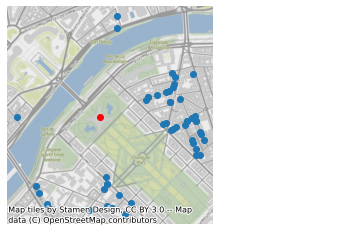

In [56]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)
# dist_eiffel = restaurants.geometry.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km
restaurants_eiffel = restaurants[dist_eiffel<1000]

# Make a plot of the close-by restaurants
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## 2.5. The spatial join operation / Paris: spatial join of districts and bike stations

Let's return to the Paris data on districts and bike stations. We will now use the spatial join operation to identify the district in which each station is located.

The districts and bike sharing stations datasets are already pre-loaded for you as the `districts` and `stations GeoDataFrames`, and GeoPandas has been imported as `geopandas`.

---

- Use the `geopandas.sjoin()` function to add the district name in which each station is located to the `stations` dataset. Call the result `joined`.

- Check the result by showing the first five rows.

In [60]:
stations=gpd.read_file("paris_sharing_bike_stations_utm.geojson")

In [63]:
stations.head(2)

name  bike_stands  available_bikes  \
0               14002 - RASPAIL QUINET           44                4   
1  20503 - COURS DE VINCENNES PYRÉNÉES           21                3   

                         geometry  
0  POINT (450804.449 5409797.268)  
1  POINT (456414.352 5410698.461)

In [66]:
stations.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
districts=districts.to_crs(epsg=32631)

In [68]:
districts.head(2)

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...

In [69]:
# Join the districts and stations datasets
# joined = geopandas.sjoin(stations,districts,op="within")
joined = geopandas.sjoin(stations,districts,predicate="within")

# Inspect the first five rows of the result
print(joined.head())

                                       name  bike_stands  available_bikes  \
0                    14002 - RASPAIL QUINET           44                4   
143  14112 - FAUBOURG SAINT JACQUES CASSINI           16                0   
293               14033 - DAGUERRE GASSENDI           38                1   
346     14006 - SAINT JACQUES TOMBE ISSOIRE           22                0   
429       14111 - DENFERT-ROCHEREAU CASSINI           24                8   

                           geometry  index_right  id district_name  population  
0    POINT (450804.449 5409797.268)           52  53  Montparnasse       18570  
143  POINT (451419.447 5409421.529)           52  53  Montparnasse       18570  
293  POINT (450708.228 5409406.941)           52  53  Montparnasse       18570  
346  POINT (451340.026 5409124.575)           52  53  Montparnasse       18570  
429  POINT (451274.511 5409609.731)           52  53  Montparnasse       18570  


## 2.6. Map of tree density by district (1)

Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district. For this, we first need to find out how many trees each district contains, which we will do in this exercise. In the following exercise, we will then use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join. Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

GeoPandas has been imported as geopandas.

---
1. Import the trees dataset `"paris_trees.gpkg"` and call the result `trees`. Also read the districts dataset we have seen previously `("paris_districts_utm.geojson")`, and call this `districts`.

2. Add a column with the `'district_name'` to the `trees` dataset using a spatial join. Call the result `joined`.

3. Calculate the number of trees located in each district: group the `joined` DataFrame by the `'district_name'` column, and calculate the size of each group. We convert the resulting Series `trees_by_district` to a DataFrame for the next exercise.

In [71]:
# 1. Read the trees and districts data
trees = geopandas.read_file("paris_trees_small.gpkg")
districts = geopandas.read_file("paris_districts_utm.geojson")

# 1. The trees dataset with point locations of trees
print(trees.head())

# 2. Spatial join of the trees and districts datasets
# joined = geopandas.sjoin(trees,districts,op='within')
joined = geopandas.sjoin(trees,districts,predicate='within')

      species location_type                        geometry
0  Marronnier    Alignement  POINT (455834.122 5410780.606)
1  Marronnier    Alignement  POINT (446546.284 5412574.697)
2  Marronnier    Alignement  POINT (449768.283 5409876.557)
3  Marronnier    Alignement  POINT (451779.708 5409292.071)
4     Sophora    Alignement  POINT (447041.361 5409756.712)


In [72]:
# 3. Calculate the number of trees in each district
trees_by_district = joined.groupby("district_name").size()

# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

# Inspect the result
print(trees_by_district.head())

                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392


## 2.7. Map of tree density by district (2)

Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (`trees_by_district`) back to the districts dataset. We will use the `pd.merge()` function to join two dataframes based on a common column.

Since not all districts have the same size, it is a fairer comparison to visualize the tree density: the number of trees relative to the area.

The district dataset has been pre-loaded as `districts`, and the final result of the previous exercise (a DataFrame with the number of trees for each district) is available as `trees_by_district`. GeoPandas has been imported as `geopandas` and Pandas as `pd`.

---
1. Use the `pd.merge()` function to merge `districts` and `trees_by_district` dataframes on the `'district_name'` column. Call the result `districts_trees`.

2. Add a column `'n_trees_per_area'` to the `districts_trees` dataframe, based on the `'n_trees'` column divided by the area.

3. Make a plot of the `districts_trees` dataframe, using the `'n_trees_per_area'` column to determine the color of the polygons.

                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7  


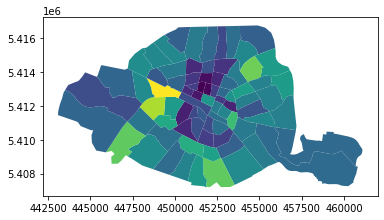

In [73]:
# 1. Print the first rows of the result of the previous exercise
print(trees_by_district.head())

# 1. Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts,trees_by_district,on=['district_name'])

# 1. Inspect the result
print(districts_trees.head())

# 2. Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees']/districts_trees.geometry.area

# 3. Make of map of the districts colored by 'n_trees_per_area'
districts_trees.plot('n_trees_per_area')
plt.show()

Geopandas Choropleths documentation: https://geopandas.org/en/stable/gallery/choropleths.html

## 2.8. Equal interval choropleth

In the last exercise, we created a map of the tree density. Now we know more about choropleths, we will explore this visualisation in more detail.

First, let's visualize the effect of just using the number of trees versus the number of trees normalized by the area of the district (the tree density). Second, we will create an equal interval version of this map instead of using a continuous color scale. This classification algorithm will split the value space in equal bins and assign a color to each.

The `district_trees` GeoDataFrame, the final result of the previous exercise is already loaded. It includes the variable `n_trees_per_area`, measuring tree density by district (note the variable has been multiplied by 10,000).

---
- Make a plot using the `'n_trees'` variable to color the polygons. Make sure to also display a legend using the `legend` keyword.

- Repeat the same using the `'n_trees_per_area'` variable. Do you see the difference?

- Generate a choropleth with the `'n_trees_per_area'` variable using an equal interval classification scheme. Again, make sure to add a legend.

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  \
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40   
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40   
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4   
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7   
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7   

   n_trees_per_area  
0          0.000046  
1          0.000097  
2          0.000015  
3          0.000026  
4          0.000037  


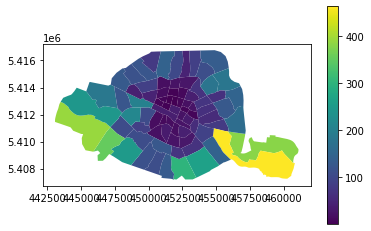

In [74]:
# Print the first rows of the tree density dataset
print(districts_trees.head())

# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees', legend=True)
plt.show()

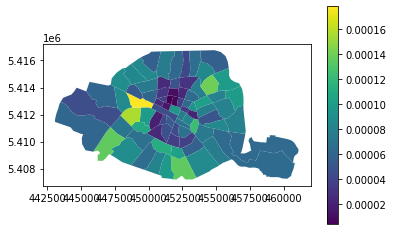

In [75]:
# Make a choropleth of the number of trees per area
districts_trees.plot(column='n_trees_per_area', legend=True)
plt.show()

In [77]:
!pip install mapclassify

In [ ]:
# Make a choropleth of the number of trees 
# districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', legend=True)
# plt.show()

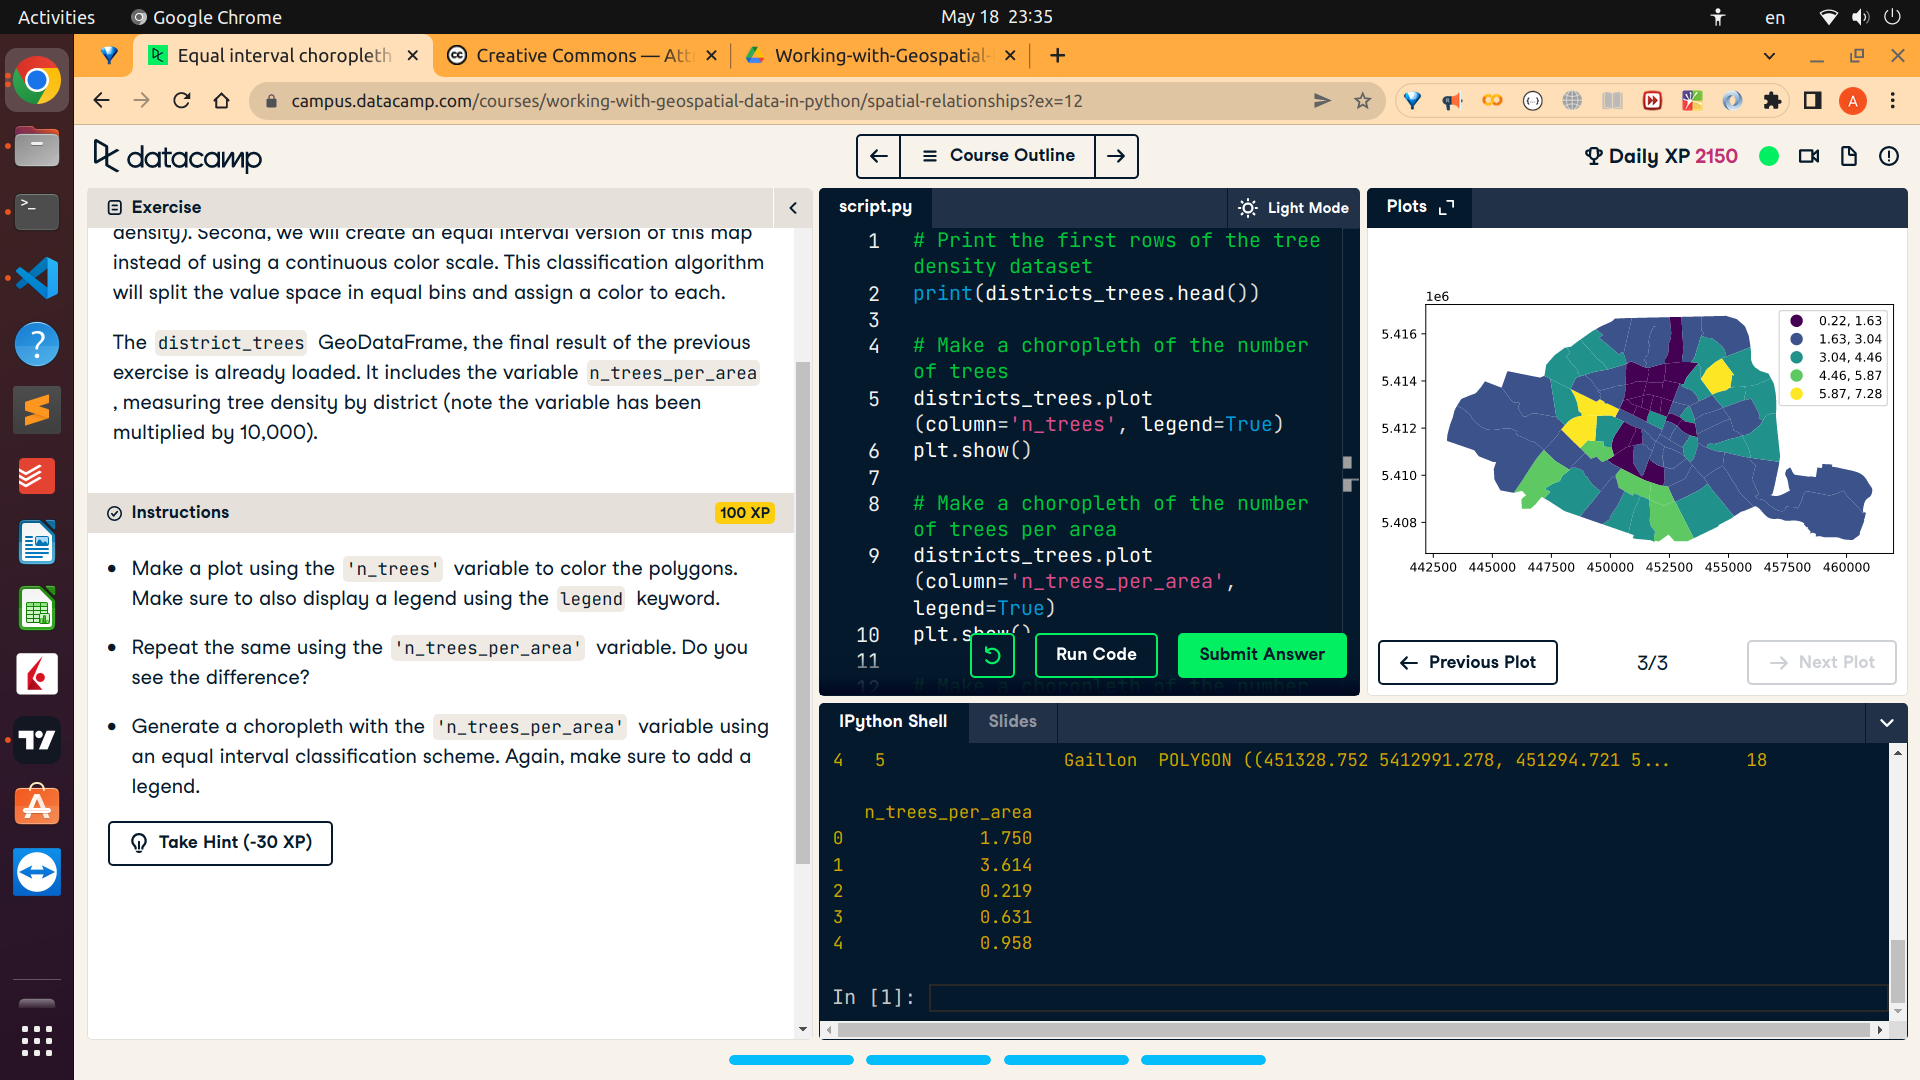

## 2.9. Quantiles choropleth

In this exercise we will create a quantile version of the tree density map. Remember that the quantile algorithm will rank and split the values into groups with the same number of elements to assign a color to each. This time, we will create seven groups that allocate the colors of the `YlGn` colormap across the entire set of values.

The `district_trees` GeoDataFrame is again already loaded. It includes the variable `n_trees_per_area`, measuring tree density by district (note the variable has been multiplied by 10,000).

---
- Generate a choropleth using the `'n_trees_per_area'` variable, a quantile classification scheme with 7 classes and the `YlGn` color map. Assign the result to a variable named `ax`.

- Remove the frames, ticks and tick labels from the plot for a cleaner map using the `set_axis_off()` method.

In [84]:
# # Generate the choropleth and store the axis
# ax = districts_trees.plot(column='n_trees_per_area', scheme='quantiles',k=7, cmap='YlGn', legend=True)

# # Remove frames, ticks and tick labels from the axis
# ax.set_axis_off()
# plt.show()

https://geopandas.org/en/stable/gallery/choropleths.html

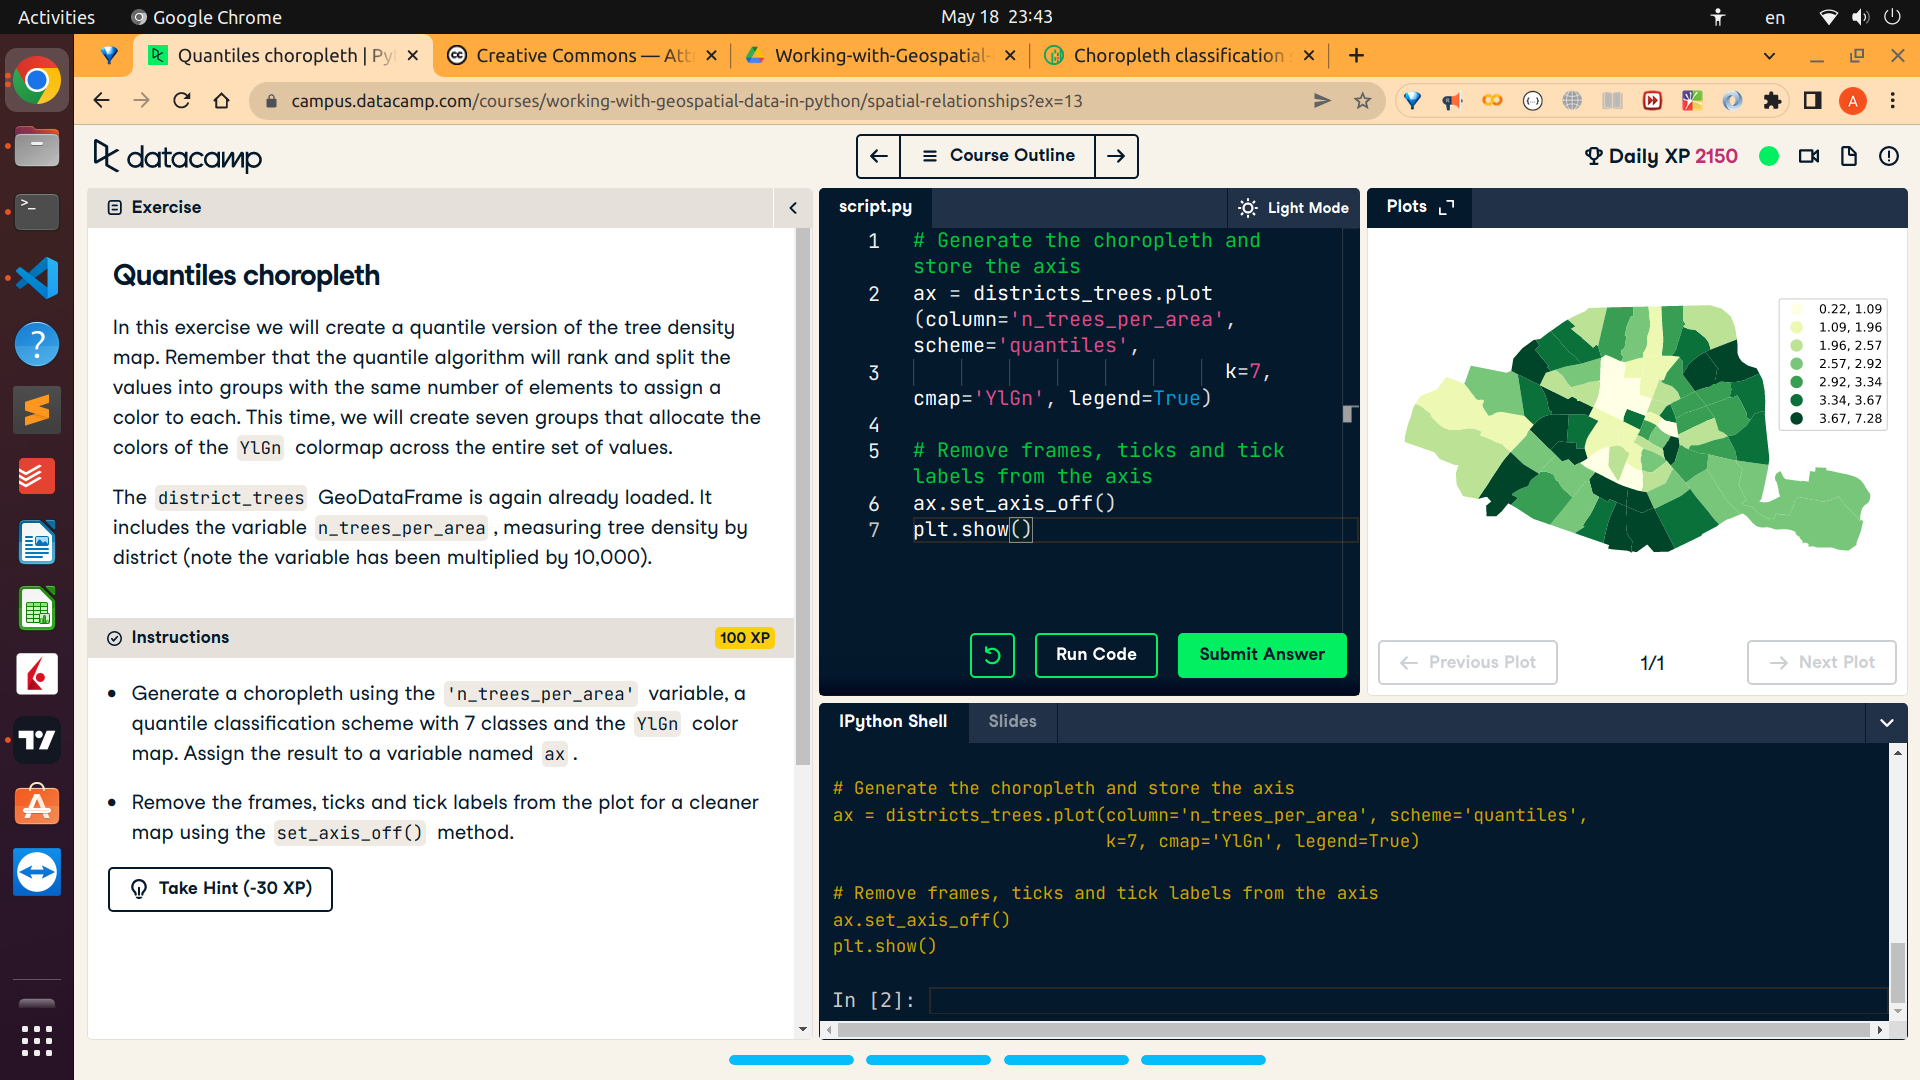

## 2.10. Compare classification algorithms

In this final exercise, you will build a multi map figure that will allow you to compare the two approaches to map variables we have seen.

You will rely on standard `matplotlib` patterns to build a figure with two subplots (Axes `axes[0]` and `axes[1]`) and display in each of them, respectively, an equal interval and quantile based choropleth. Once created, compare them visually to explore the differences that the classification algorithm can have on the final result.

This exercise comes with a GeoDataFrame object loaded under the name `district_trees` that includes the variable `n_trees_per_area`, measuring tree density by district.

---

- Make a choropleth for the `'n_trees_per_area'` column using the equal interval classification scheme on the first subplot (`axes[0]`). Remember that you can pass the matplotlib axes object to the `ax` keyword.

- Do the same for the quantile classification scheme on the second subplot (`axes[1]`). As in the previous plot, set the title and remove the box and axis labels to create a cleaner figure.

In [83]:
# # Set up figure and subplots
# fig, axes = plt.subplots(nrows=2)

# # Plot equal interval map
# districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', k=5, legend=True, ax=axes[0])
# axes[0].set_title('Equal Interval')
# axes[0].set_axis_off()

# # Plot quantiles map
# districts_trees.plot(column='n_trees_per_area', scheme='quantiles', k=5, legend=True, ax=axes[1])
# axes[1].set_title('Quantiles')
# axes[1].set_axis_off()

# # Display maps
# plt.show()

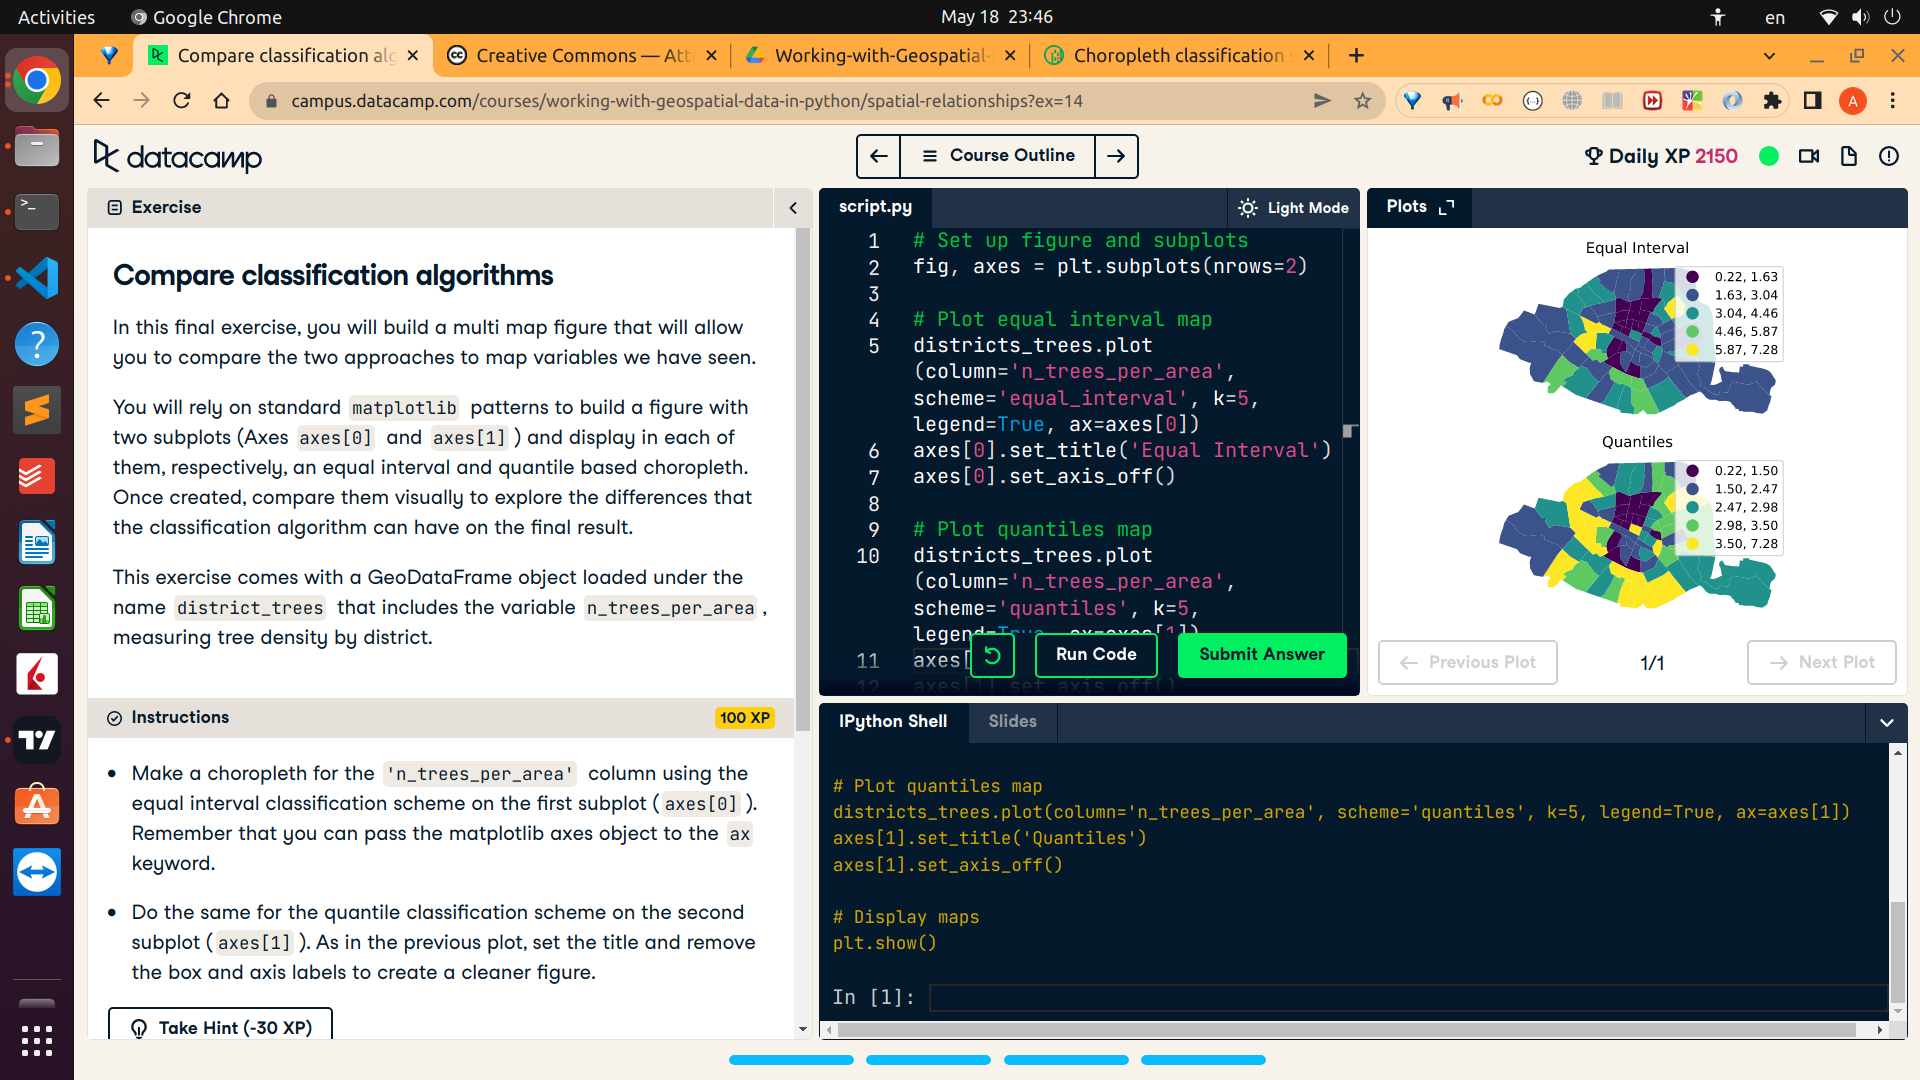

# Chapter 3: Projecting and transforming geometries

In this chapter, we will take a deeper look into how the coordinates of the geometries are expressed based on their Coordinate Reference System (CRS). You will learn the importance of those reference systems and how to handle it in practice with GeoPandas. Further, you will also learn how to create new geometries based on the spatial relationships, which will allow you to overlay spatial datasets. And you will further practice this all with Paris datasets!

Refer to [slides of Chapter 3 here](https://drive.google.com/file/d/1Vggq2uSSspFlFFrIGQoeT8U_aOvTaAbq/view?usp=sharing)

## 3.1. Geographic vs projected coordinates

The CRS attribute stores the information about the Coordinate Reference System in which the data is represented. In this exercises, we will explore the CRS and the coordinates of the districts dataset about the districts of Paris.

---
- Look at the CRS attribute of the GeoDataFrame. Do you recognize the EPSG number?

- Look at the values of the coordinates. What is the range, and what are the differences between different points? Can this be meters, or are it degrees?

In [86]:
# Import the districts dataset
# districts = geopandas.read_file("paris_districts.geojson")
districts=districts.to_crs(epsg=4326)
# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head())

epsg:4326
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...  
1  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...  
2  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...  
3  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...  
4  POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...  


## 3.2. Projecting a GeoDataFrame

The Paris districts dataset is provided in geographical coordinates (longitude/latitude in WGS84). To see the result of naively using the data as is for plotting or doing calculations, we will first plot the data as is, and then plot a projected version.

The standard projected CRS for France is the RGF93 / Lambert-93 reference system (referenced by the `EPSG:2154` number).

GeoPandas and matplotlib have already been imported, and the districts dataset is read and assigned to the `districts` variable.

epsg:4326


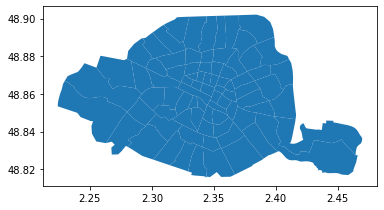

In [87]:
# Print the CRS information
print(districts.crs)

# Plot the districts dataset
districts.plot()
plt.show()

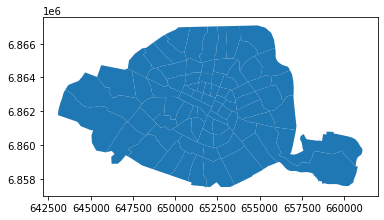

In [88]:
# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=2154)

# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

## 3.3. Projecting a Point

In the previous chapter, we worked with the Eiffel Tower location. Again, we provided you the coordinates in a projected coordinate system, so you could, for example, calculate distances. Let's return to this iconic landmark, and express its location in geographical coordinates: 48°51′29.6″N, 2°17′40.2″E. Or, in decimals: latitude of 48.8584 and longitude of 2.2945.

Shapely geometry objects have no notion of a CRS, and thus cannot be directly converted to another CRS. Therefore, we are going to use the GeoPandas to transform the Eiffel Tower point location to an alternative CRS. We will put the single point in a GeoSeries, use the `to_crs()` method, and extract the point again.

GeoPandas is already imported.

---

- Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`.

- Create a GeoSeries (called `s_eiffel_tower`) with the Eiffel Tower as the single element and specify the CRS to be EPSG:4326.

- Convert `s_eiffel_tower` to EPSG:2154, and call the result `s_eiffel_tower_projected`.

In [90]:
# Construct a Point object for the Eiffel Tower
from shapely.geometry import Point
eiffel_tower = Point(2.2945,48.8584)

# Put the point in a GeoSeries with the correct CRS
# s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'})
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs=('EPSG:4326'))
# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


## 3.4. Calculating distance in a projected CRS
Now we have the Eiffel Tower location in a projected coordinate system, we can calculate the distance to other points.

The final `s_eiffel_tower_projected` of the previous exercise containing the projected Point is already provided, and we extract the single point into the `eiffel_tower` variable. Further, the `restaurants` dataframe (using WGS84 coordinates) is also loaded.

---

- Convert the `restaurants` to the same CRS as the Eiffel Tower point. For this exercise, don't specify the `epsg` keyword, but make use of the `.crs` attribute.

- Calculate the distance for all restaurants to the Eiffel Tower.

- Print the smallest distance.

In [93]:
s_eiffel_tower_projected.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [102]:
# Extract the single Point
# eiffel_tower = s_eiffel_tower_projected[0]
eiffel_tower = s_eiffel_tower_projected[0]

# Ensure the restaurants use the same CRS
# restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

restaurants =restaurants.set_crs(epsg=3857,allow_override=True)
restaurants = restaurants.to_crs(epsg=2154)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.geometry.distance(eiffel_tower)

# The distance to the closest restaurant
print(min(dist_eiffel))

303.56255387803174


In [99]:
print(eiffel_tower)

POINT (648237.3015492002 6862271.68155358)


In [103]:
restaurants.head(2)

type              x             y  \
0            European restuarant  259641.691646  6.251867e+06   
1  Traditional French restaurant  259572.339603  6.252030e+06   

                         geometry  
0  POINT (651023.584 6862903.422)  
1  POINT (650978.785 6863010.664)

## 3.5. Projecting to Web Mercator for using web tiles

In the first chapter, we did an exercise on plotting the restaurant locations in Paris and adding a background map to it using the `contextily` package.

Currently, `contextily` assumes that your data is in the Web Mercator projection, the system used by most web tile services. And in that first exercise, we provided the data in the appropriate CRS so you didn't need to care about this aspect.

However, typically, your data will not come in Web Mercator (`EPSG:3857`) and you will have to align them with web tiles on your own.

GeoPandas, matplotlib and contextily are already imported.

--- 

- Convert the `restaurants` dataset to the Web Mercator projection (`EPSG:3857`). Call the result `restaurants_webmercator`.

- Make a plot of this projected dataset (specify the marker size to be 1) and add a background map using `contextily`.

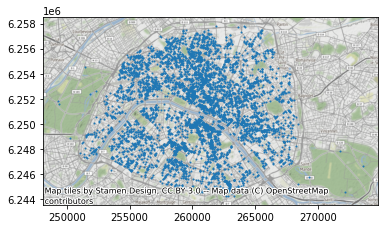

In [104]:
# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize=1)
contextily.add_basemap(ax)
plt.show()

## 3.6. Spatial operations: creating new geometries / Exploring a Land Use dataset

For the following exercises, we first introduce a new dataset: a dataset about the land use of Paris (a simplified version based on the open European [Urban Atlas](https://land.copernicus.eu/local/urban-atlas)). The land use indicates for what kind of activity a certain area is used, such as residential area or for recreation. It is a polygon dataset, with a label representing the land use class for different areas in Paris.

In this exercise, we will read the data, explore it visually, and calculate the total area of the different classes of land use in the area of Paris.

GeoPandas and matplotlib are already imported.

---

- Read in the `'paris_land_use.shp'` file and assign the result to a variable `land_use`.

- Make a plot of `land_use`, using the `'class'` column to color the polygons. We also add a legend. Note: it might take a few seconds for the plot to generate because there are a lot of polygons.

- Add a new column `'area'` with the area of each polygon.

- Calculate the total area in km² for each `'class'` using the `groupby()` method, and print the result.

In [ ]:
# # Import the land use dataset
# land_use = geopandas.read_file('paris_land_use.shp')
# print(land_use.head())

# # Make a plot of the land use with 'class' as the color
# land_use.plot('class', legend=True, figsize=(15, 10))
# plt.show()

# # Add the area as a new column
# land_use['area'] = land_use.geometry.area

# # Calculate the total area for each land use class
# total_area = land_use.groupby('class')['area'].sum() / 1000**2
# print(total_area)

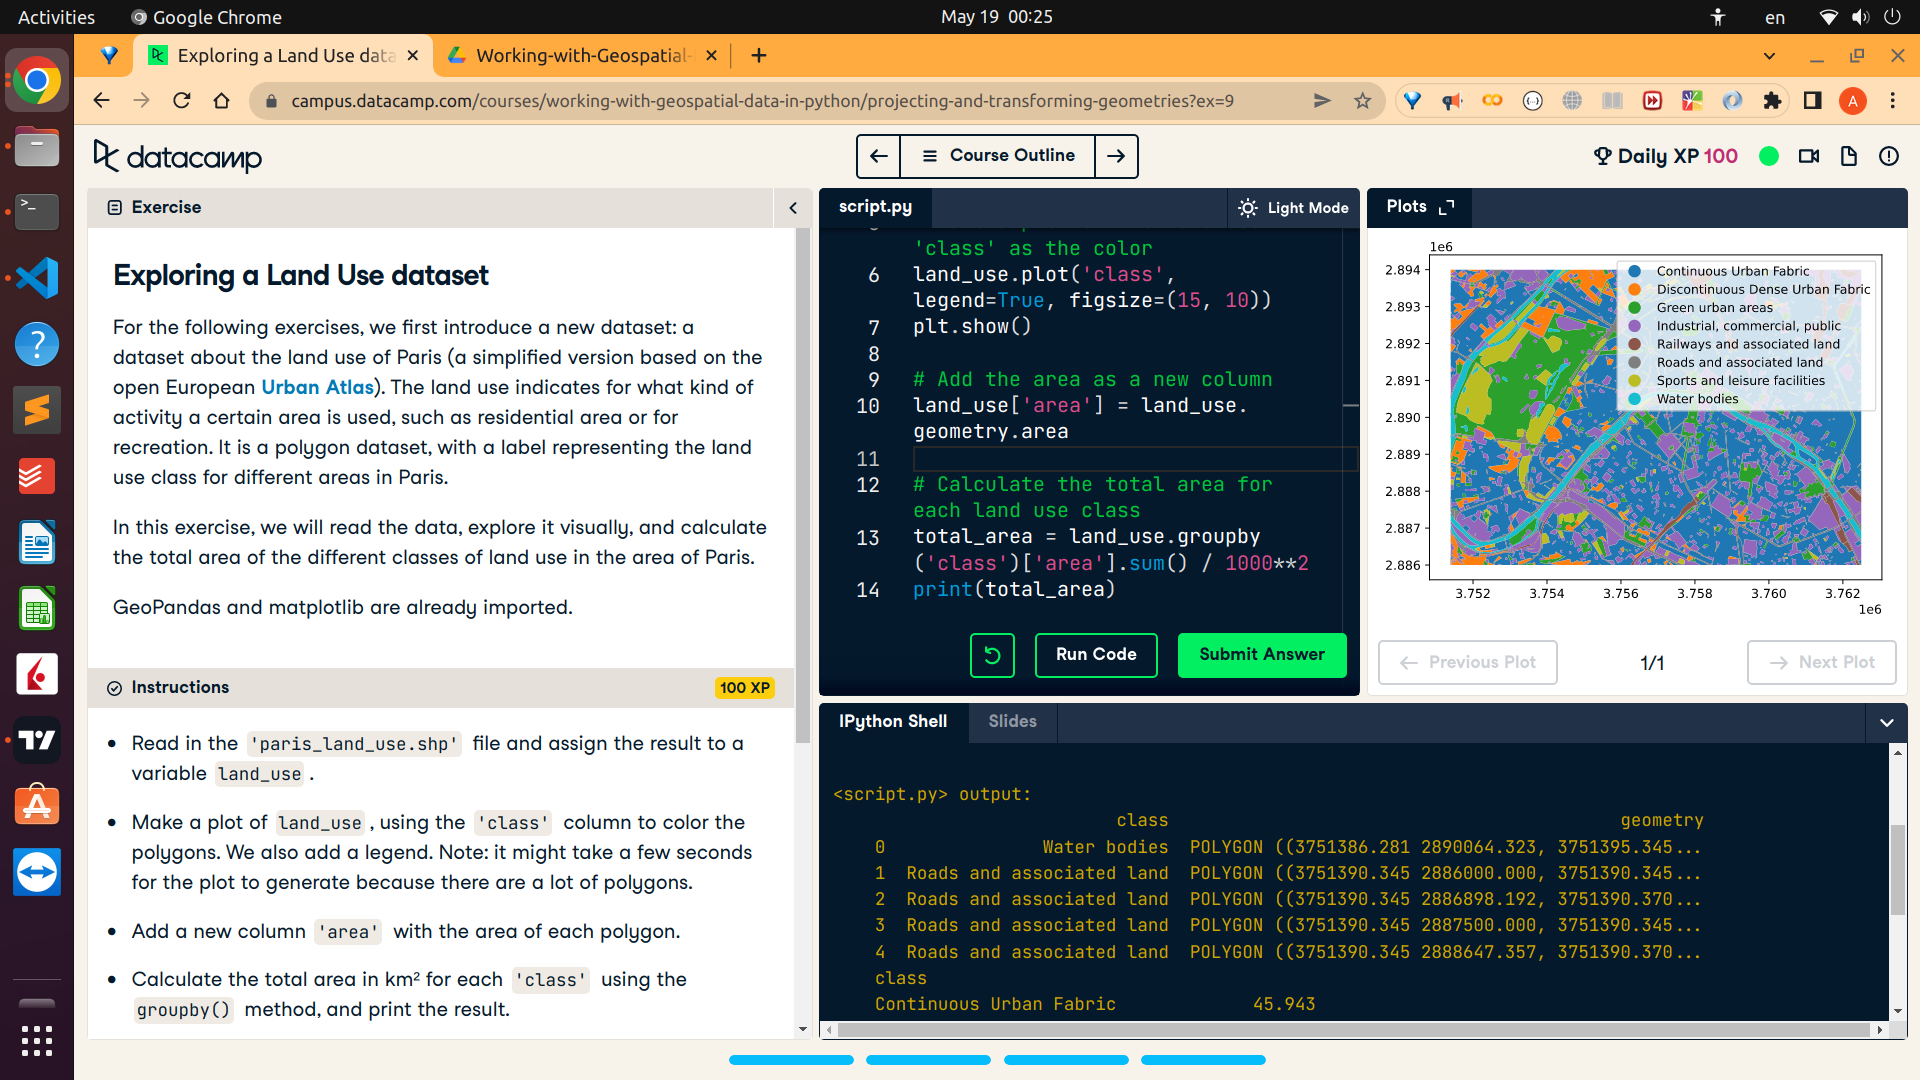



```
class
    Continuous Urban Fabric             45.943
    Discontinuous Dense Urban Fabric     3.657
    Green urban areas                    9.858
    Industrial, commercial, public      13.295
    Railways and associated land         1.936
    Roads and associated land            7.402
    Sports and leisure facilities        3.579
    Water bodies                         3.190
    Name: area, dtype: float64
```



## 3.7. Intersection of two polygons

For this exercise, we are going to use 2 individual polygons: the district of Muette extracted from the districts dataset, and the green urban area of Boulogne, a large public park in the west of Paris, extracted from the `land_use` dataset. The two polygons have already been assigned to the `muette` and `park_boulogne` variables.

We first visualize the two polygons. You will see that they overlap, but the park is not fully located in the district of Muette. Let's determine the overlapping part.

GeoPandas and matplotlib and are already imported.

---

- Plot the two polygons in a single map to examine visually the degree of overlap

- Calculate the intersection of the `park_boulogne` and `muette` polygons.

- Print the proportion of the area of the district that is occupied by the park.

In [105]:
# # Plot the two polygons
# geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])
# plt.show()

# # Calculate the intersection of both polygons
# intersection = park_boulogne.intersection(muette)

# # Plot the intersection
# geopandas.GeoSeries([intersection]).plot()
# plt.show()

# # Print proportion of district area that occupied park
# print(intersection.area / muette.area)

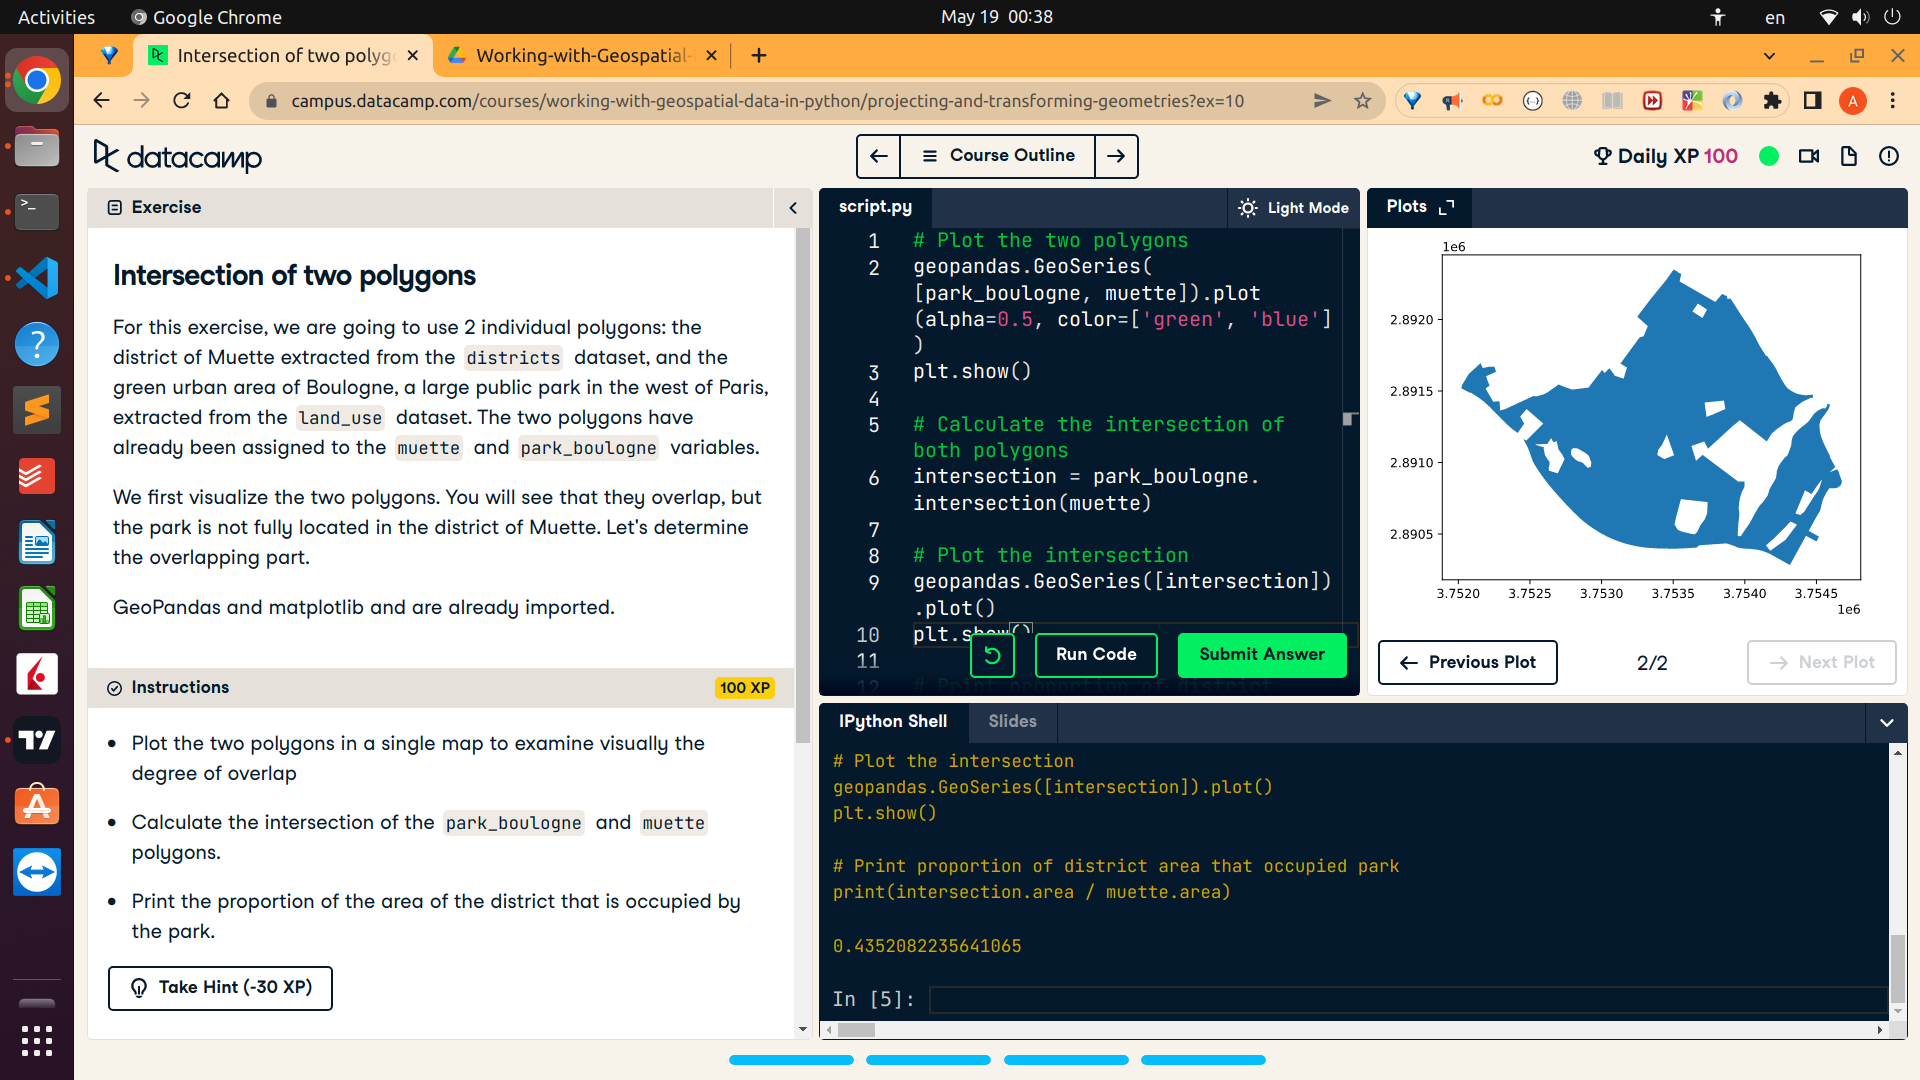

## 3.8. Intersecting a GeoDataFrame with a Polygon

Combining the land use dataset and the districts dataset, we can now investigate what the land use is in a certain district.

For that, we first need to determine the intersection of the land use dataset with a given district. Let's take again the Muette district as example case.

The land use and districts datasets have already been imported as `land_use` and `districts`, and the Muette district has been extracted into the `muette` shapely polygon. Further, GeoPandas and matplotlib are imported.

---

- Calculate the intersection of the `land_use` polygons with the single `muette` polygon. Call the result `land_use_muette`.

- Make a quick plot of this intersection, and pass `edgecolor='black'` to more clearly see the boundaries of the different polygons.

- Print the first five rows of `land_use_muette`.

In [ ]:
# # Print the land use datset and Notre-Dame district polygon
# print(land_use.head())
# print(type(muette))

# # Calculate the intersection of the land use polygons with Notre Dame
# land_use_muette = land_use.intersection(muette)

# # Plot the intersection
# land_use_muette.plot(edgecolor='black')
# plt.show()

# # Print the first five rows of the intersection
# print(land_use_muette.head())

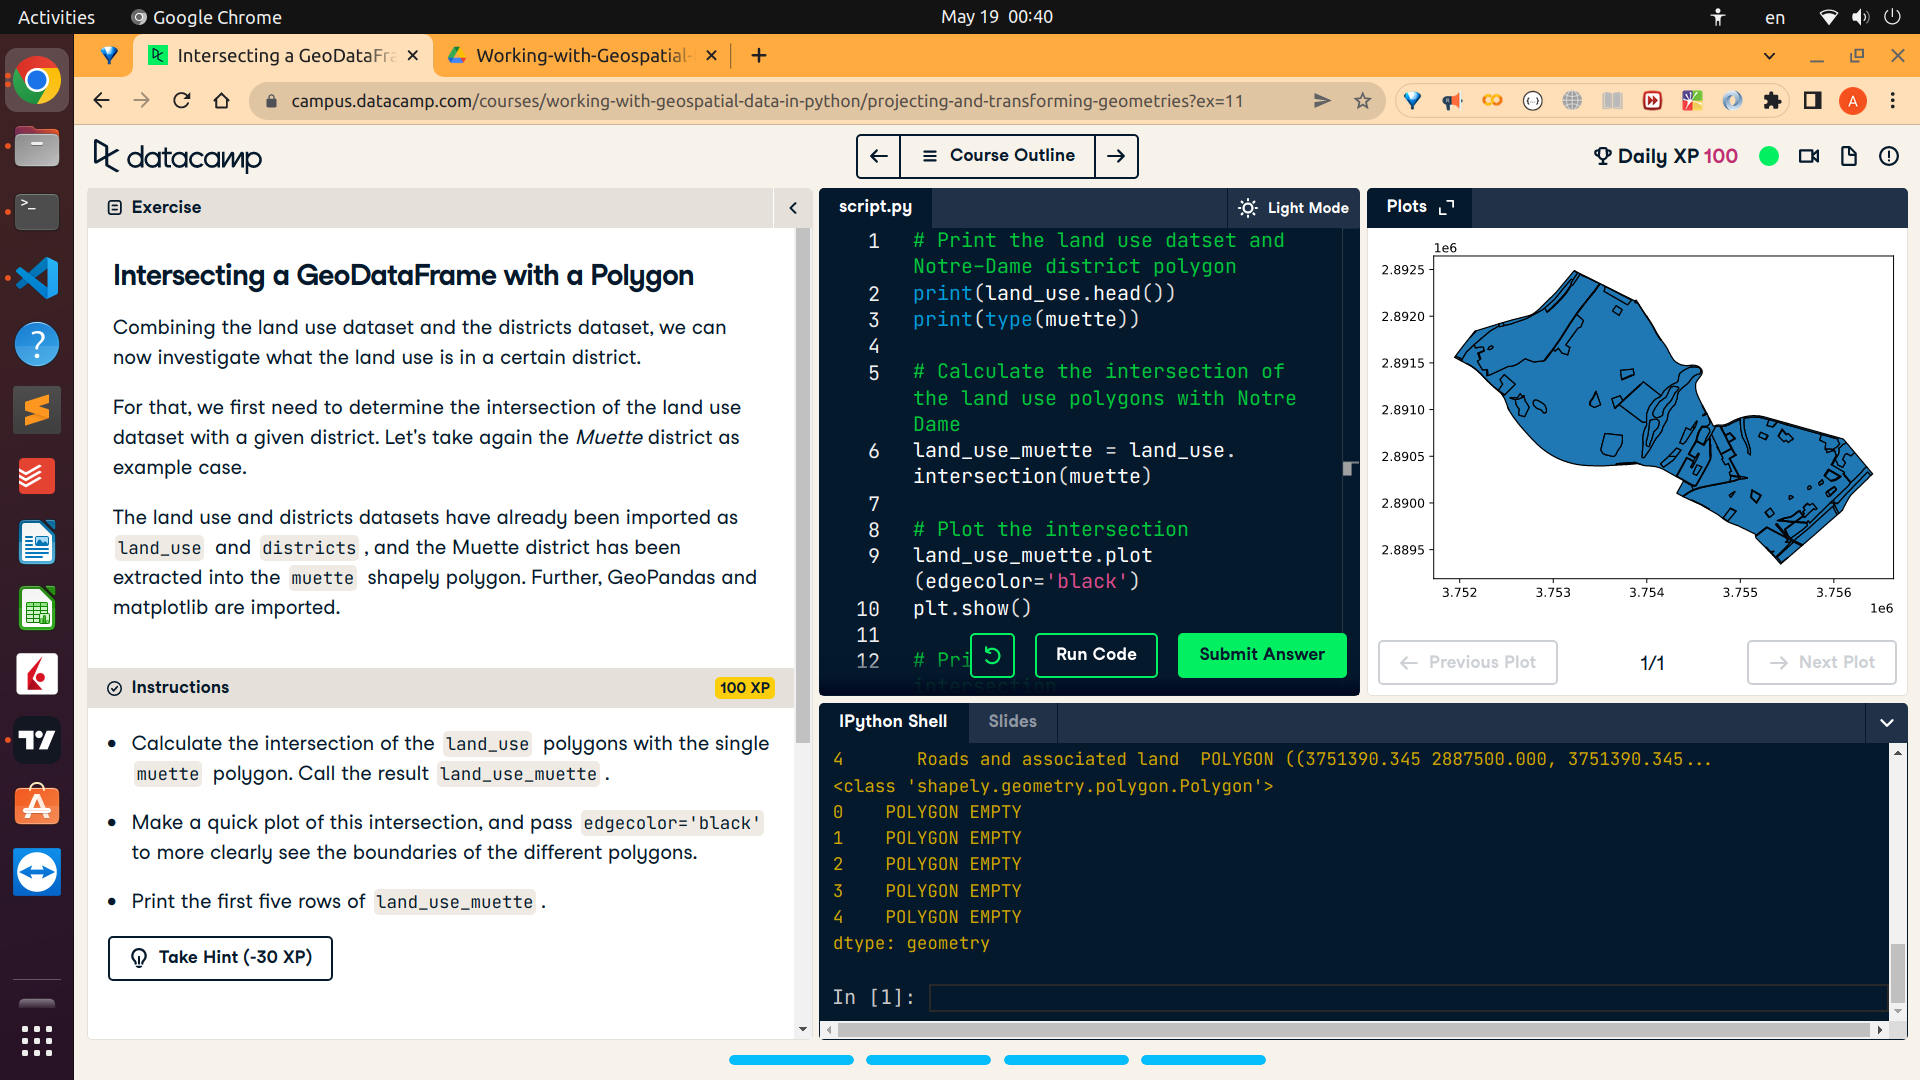

## 3.9: Overlaying spatial datasets / Overlay of two polygon layers

Going back to the land use and districts datasets, we will now combine both datasets in an overlay operation. Create a new GeoDataFrame consisting of the intersection of the land use polygons with each of the districts, but make sure to bring the attribute data from both source layers.

GeoPandas is already imported.

---
- Print the first rows of both datasets (`land_use` and `districts`).

- Create a new GeoDataFrame from the intersections of `land_use` and `districts`. Assign the result to a variable `combined`.

- Print the first rows the resulting GeoDataFrame (`combined`).

In [ ]:
# # Print the first five rows of both datasets
# print(land_use.head())
# print(districts.head())

# # Overlay both datasets based on the intersection
# combined = geopandas.overlay(land_use, districts, how='intersection')

# # Print the first five rows of the result
# print(combined.head())

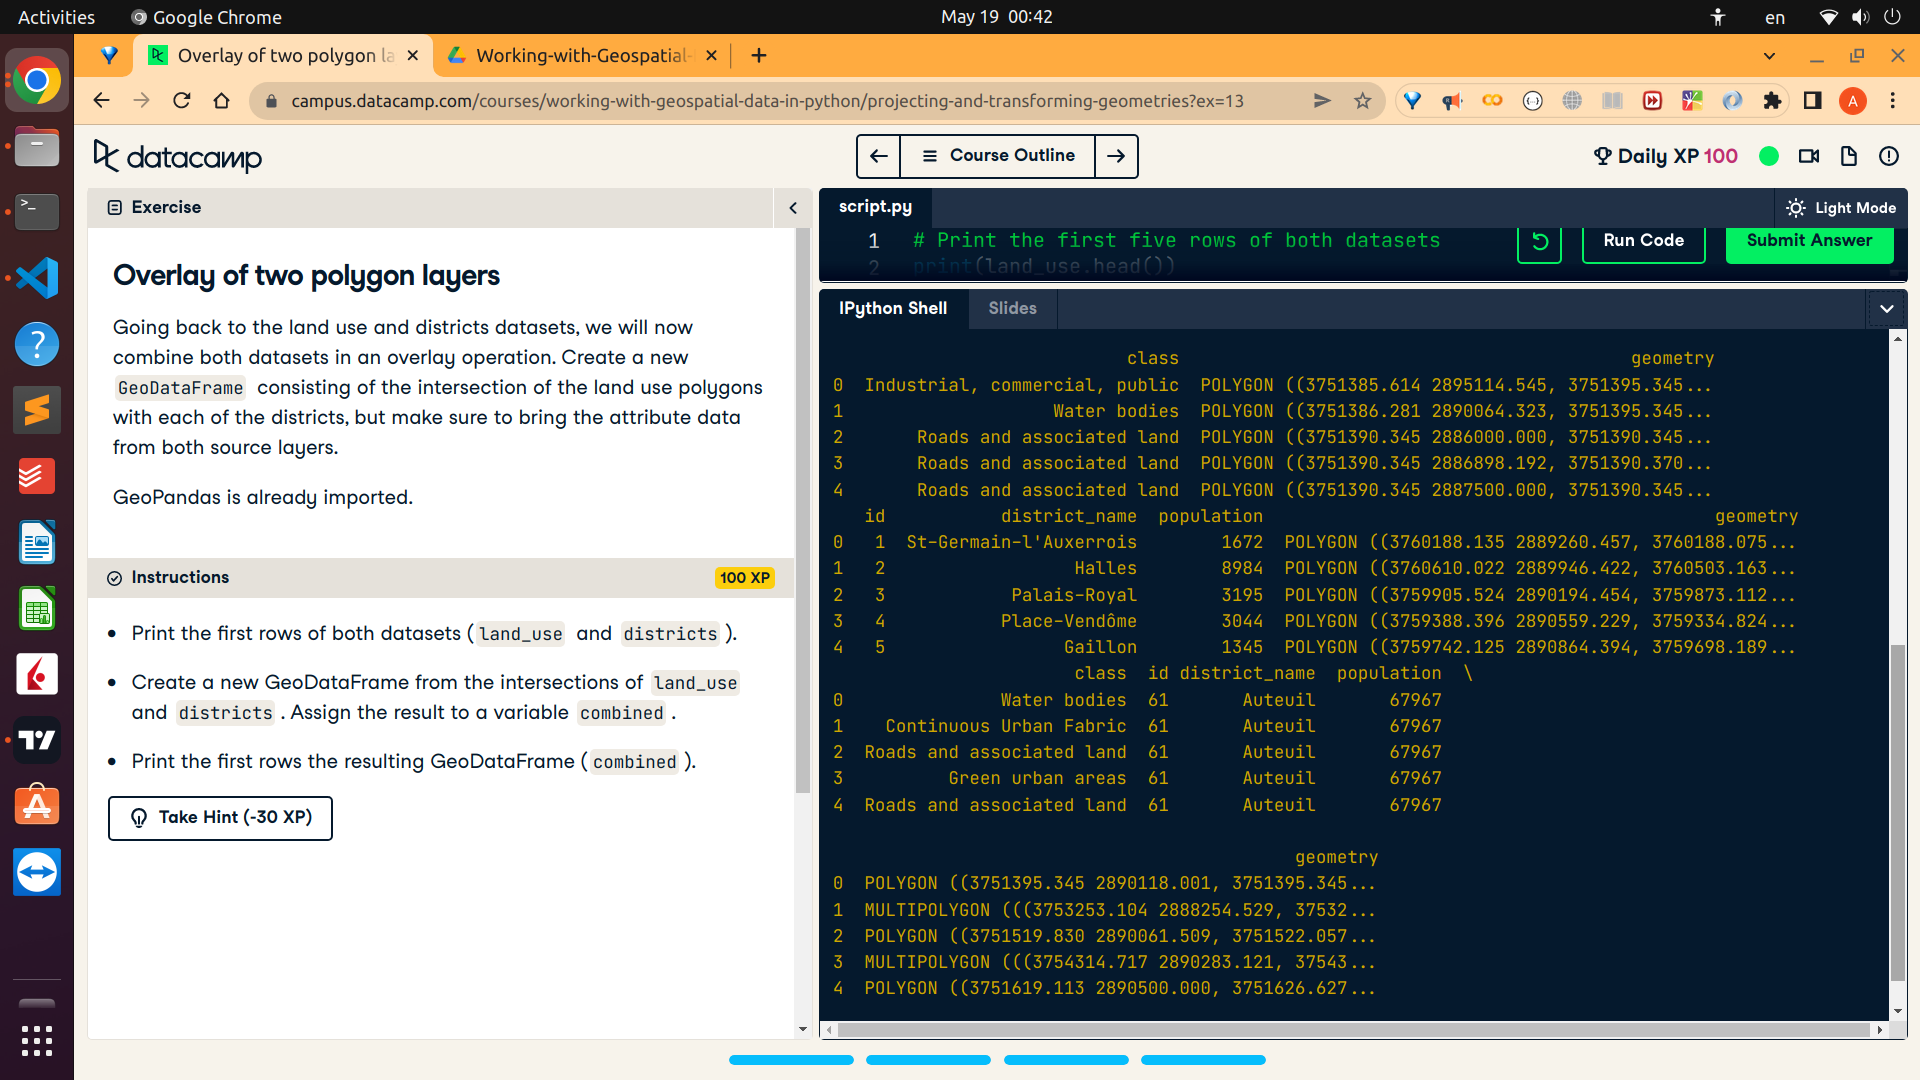

## 3.10. Inspecting the overlay result

Now that we created the overlay of the land use and districts datasets, we can more easily inspect the land use for the different districts. Let's get back to the example district of Muette, and inspect the land use of that district.

GeoPandas and Matplotlib are already imported. The result of the `overlay()` function from the previous exercises is available as combined.

---

- Add a new column `'area'` with the area of each polygon to the `combined` GeoDataFrame.

- Create a subset called `land_use_muette` where the `'district_name'` is equal to "Muette".

- Make a plot of `land_use_muette`, using the `'class'` column to color the polygons.

- Calculate the total area for each `'class'` of `land_use_muette` using the `groupby()` method, and print the result.

In [ ]:
# # Print the first rows of the overlay result
# print(combined.head())

# # Add the area as a column
# combined['area'] = combined.geometry.area

# # Take a subset for the Muette district
# land_use_muette = combined[combined['district_name']=="Muette"]

# # Visualize the land use of the Muette district
# land_use_muette.plot('class')
# plt.show()

# # Calculate the total area for each land use class
# print(land_use_muette.groupby('class')['area'].sum() / 1000**2)

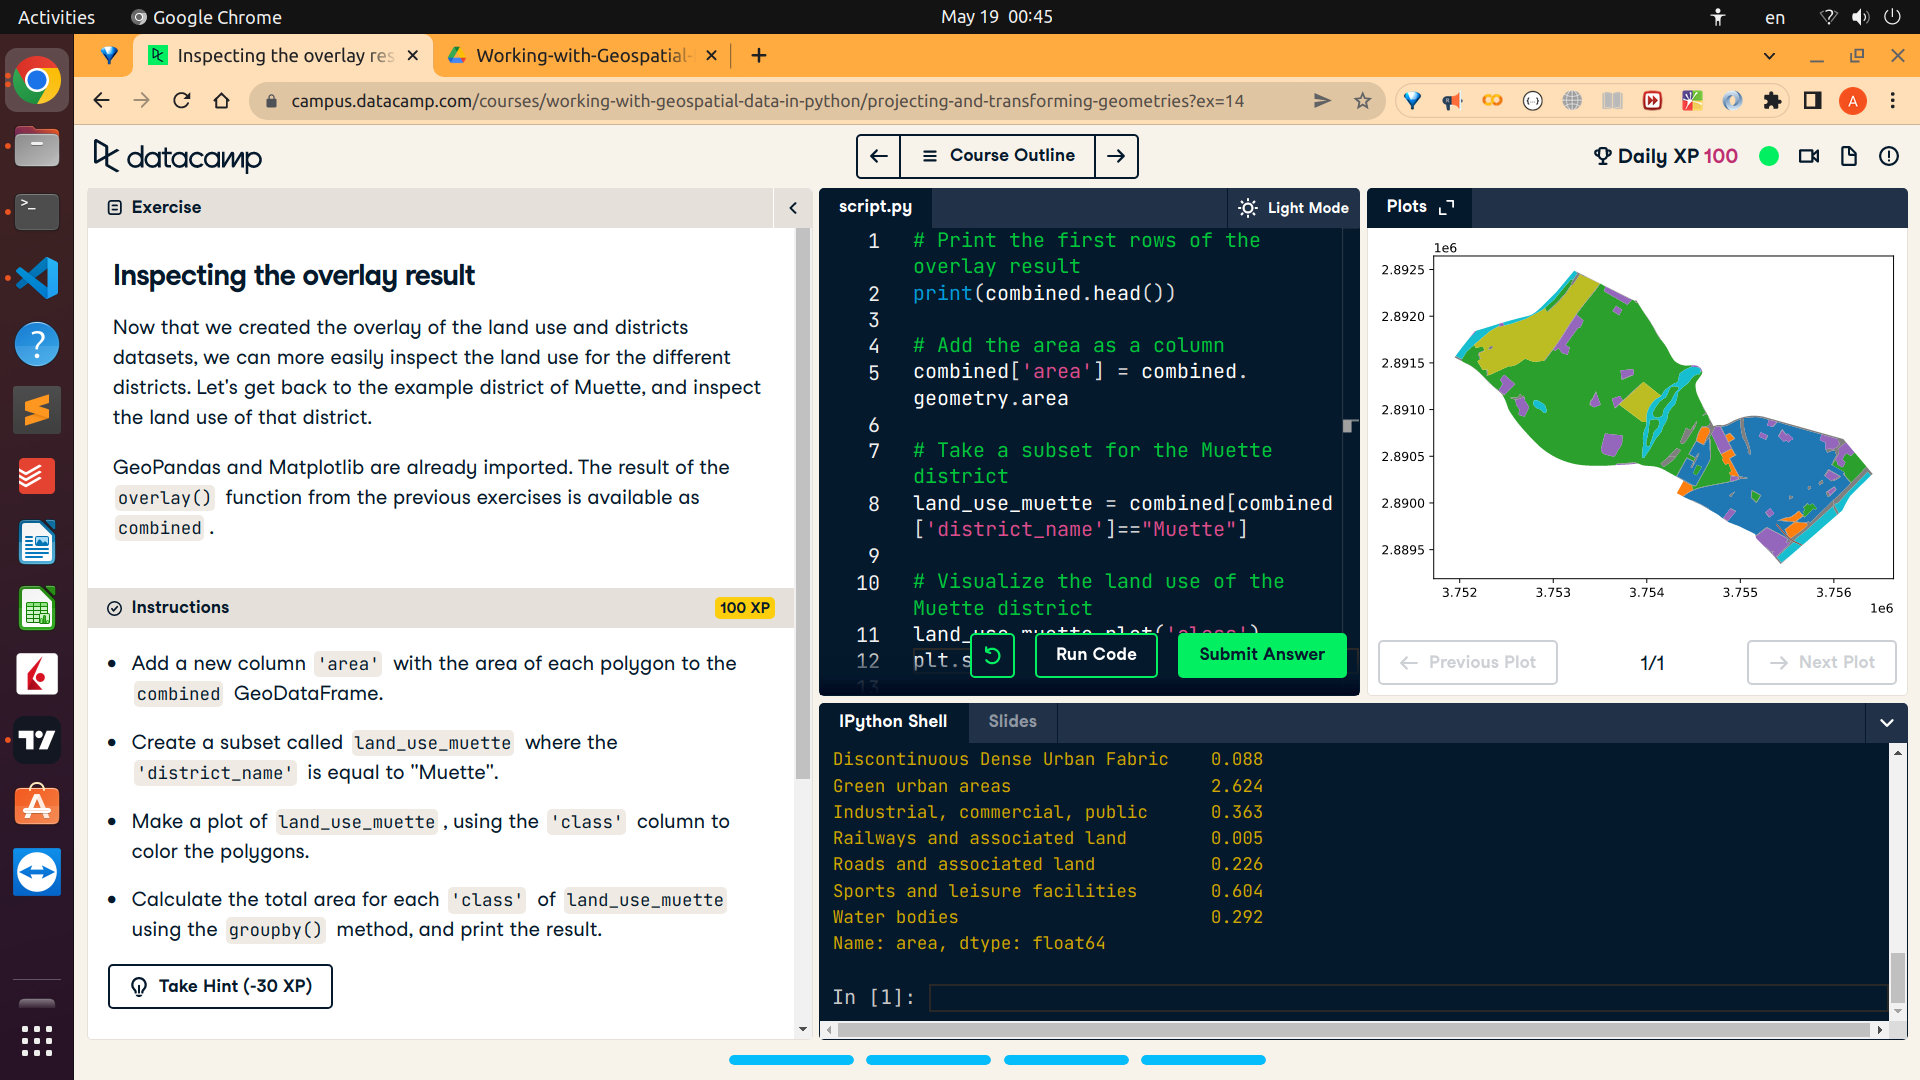

# Chapter 4: Putting it all together - Artisanal mining sites case study

In this final chapter, we leave the Paris data behind us, and apply everything we have learnt up to now on a brand new dataset about artisanal mining sites in Eastern Congo. Further, you will still learn some new spatial operations, how to apply custom spatial operations, and you will get a sneak preview into raster data.


Refer to [slides of Chapter 4 here](https://drive.google.com/file/d/1SVQOpiIEQXqXeaMYtiCEAlvHTV9Qo7aH/view?usp=sharing)

## 4.1. Import and explore the data

In this exercise, we will start with reading and exploring two new datasets:

First, a dataset on artisanal mining sites in Eastern Congo (adapted from [IPIS open data](http://ipisresearch.be/home/conflict-mapping/maps/open-data/)).
Second, a dataset on the national parks in Congo (adapted from the [World Resources Institute](https://www.wri.org/)).


For each of those datasets, the exercise consists of importing the necessary packages, reading the data with `geopandas.read_file()`, inspecting the first 5 rows and the Coordinate Reference System (CRS) of the data, and making a quick visualization.

---

1. Read and explore the mining site data ("ipis_cod_mines.geojson"), assigning it to a variable called `mining_sites`.

   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4  POINT (29.66000 0.95600)  
epsg:4326


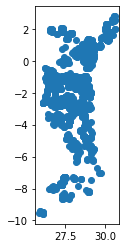

In [108]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
mining_sites = geopandas.read_file("ipis_cod_mines.geojson")

# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

# Make a quick visualisation
mining_sites.plot()
plt.show()

2. Adapt your code to do the same for the national park data (`"cod_conservation.shp"`, assign to a variable `national_parks`).

In [ ]:
# # Import GeoPandas and Matplotlib
# import geopandas
# import matplotlib.pyplot as plt

# # Read the mining site data
# national_parks = geopandas.read_file("cod_conservation.shp")

# # Print the first rows and the CRS information
# print(national_parks.head())
# print(national_parks.crs)

# # Make a quick visualisation
# national_parks.plot()
# plt.show()

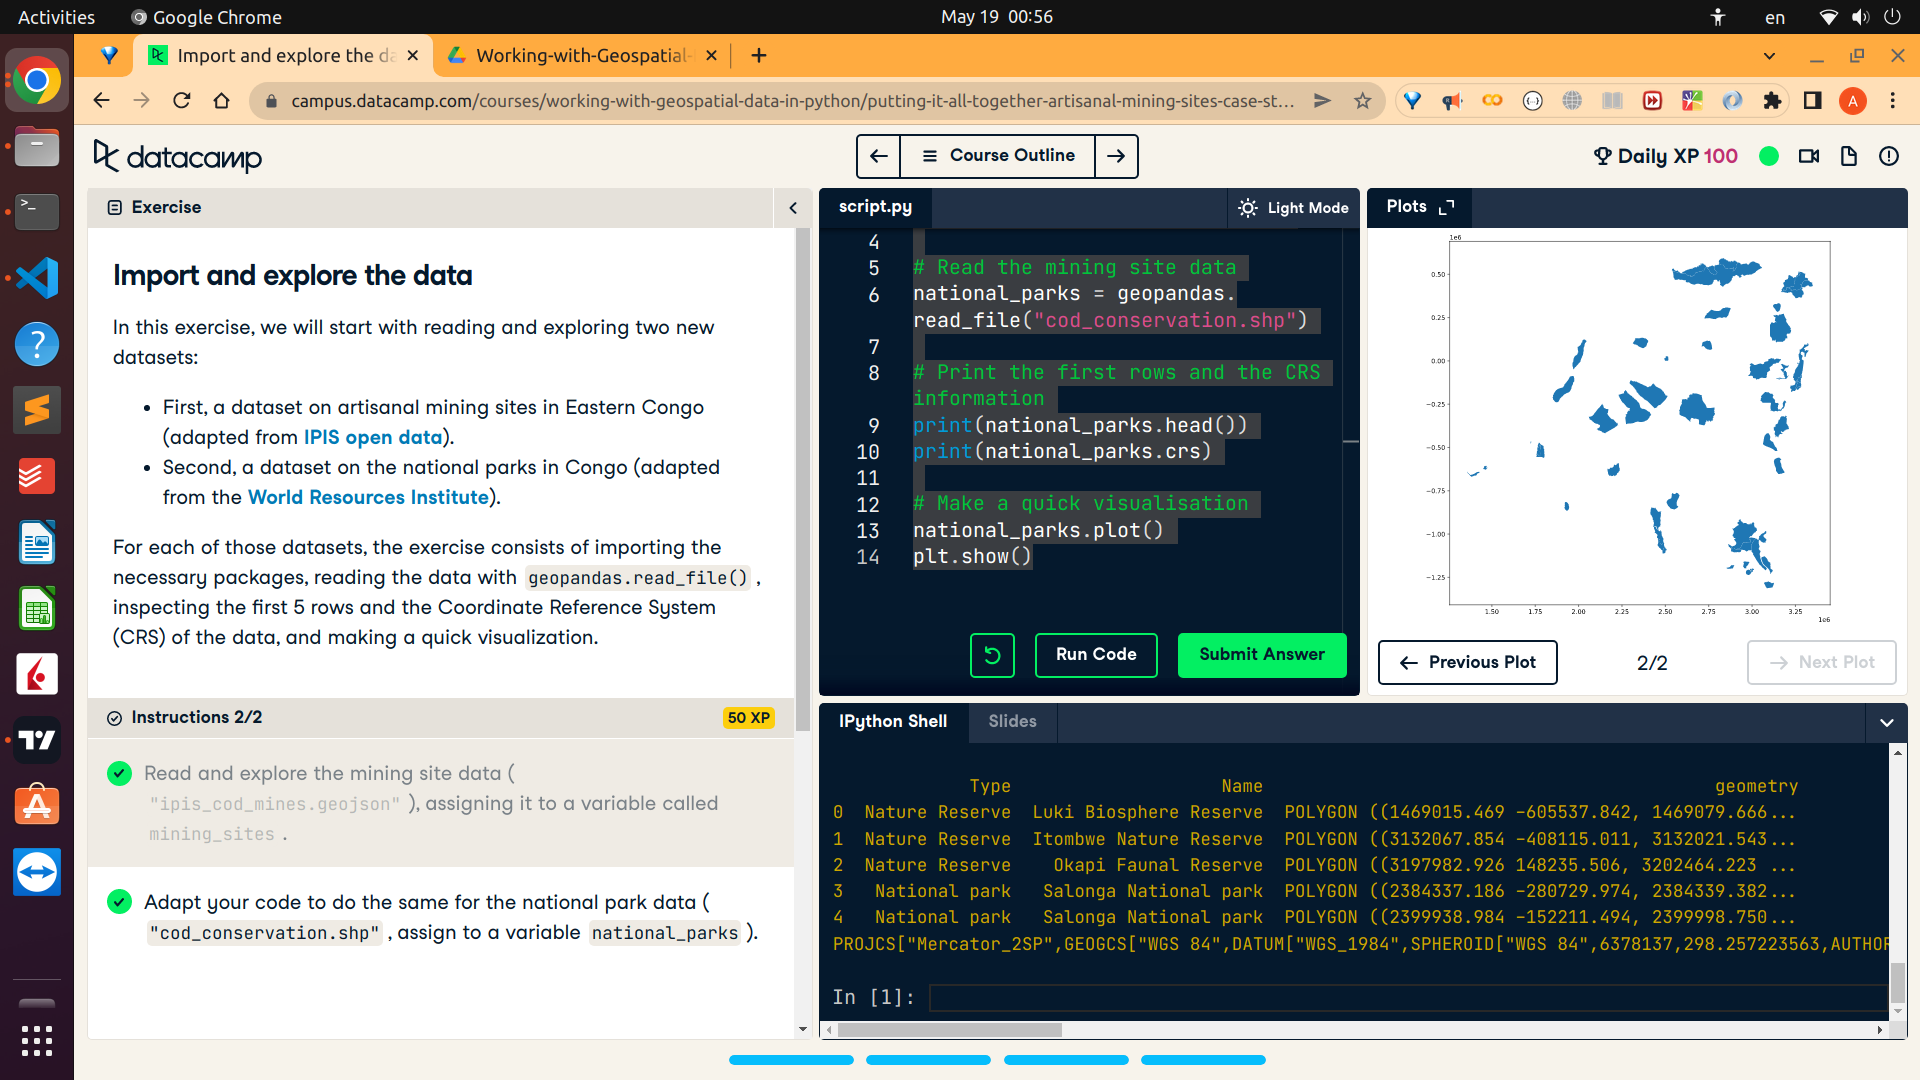

## 4.2. Convert to common CRS and save to a file
As we have seen in the previous exercises, both datasets are using a different Coordinate Reference System (CRS). This is also illustrated by the first plot in this exercise (for which the code is already provided in the script): both datasets are about the same region, so they should normally overlap in their coordinates; but they don't.

For further analyses in the rest of this chapter, we will convert both datasets to the same CRS, and save both to a new file. To ensure we can do distance-based calculations, we will convert them to a projected CRS: the local UTM zone 35, which is identified by EPSG:32735 (https://epsg.io/32735).

The mining sites (mining_sites) and national parks (national_parks) datasets are already loaded, and GeoPandas and matplotlib are imported.

---
- Convert both datasets (mining_sites and national_parks) to EPSG:32735. Name the results `mining_sites_utm` and `national_parks_utm`.

- Try again to visualize both datasets on a single map. Do both datasets now overlap?

- Write mining_sites_utm to a GeoPackage file called "ipis_cod_mines_utm.gpkg" and write national_parks_utm to an ESRI Shapefile called "cod_conservation_utm.shp".

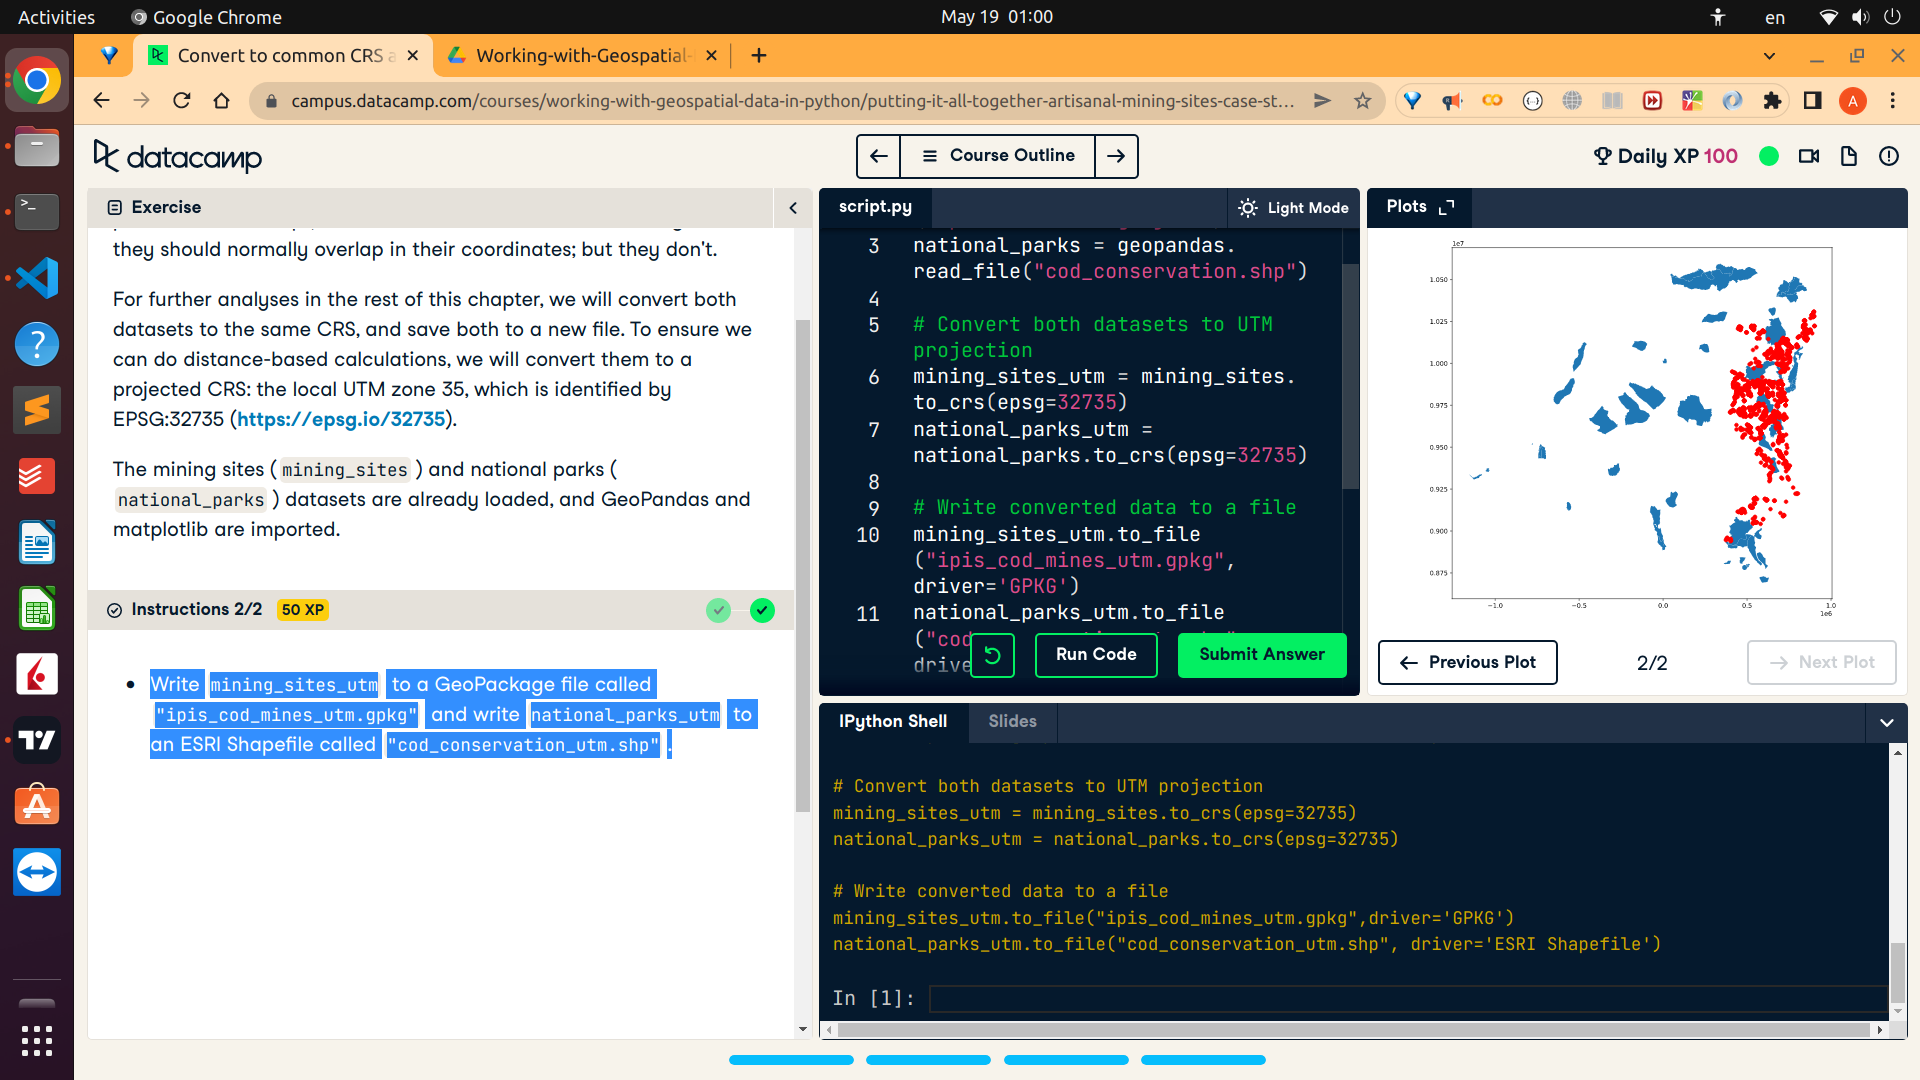

## 4.3. Styling a multi-layered plot

Now we have converted both datasets to the same Coordinate Reference System, let's make a nicer plot combining the two.

The datasets in UTM coordinates as we saved them to files in the last exercise are read back in and made available as the `mining_sites` and `national_parks` variables. GeoPandas and matplotlib are already imported.

---

- Edit the code to plot the national parks as green polygons and the mining sites as small dots (a marker size of 5).

- Apply an alpha of 0.5 to the mining site points. Further, remove the axis box and labels.

- Edit the code to color the points based on the 'mineral' column instead of specifying alpha. Make sure to add a legend.

In [ ]:
# # Plot of the parks and mining sites
# ax = national_parks.plot(color='green')
# mining_sites.plot(column='mineral',ax=ax, markersize=5, alpha=0.5, legend=True)
# ax.set_axis_off()
# plt.show()

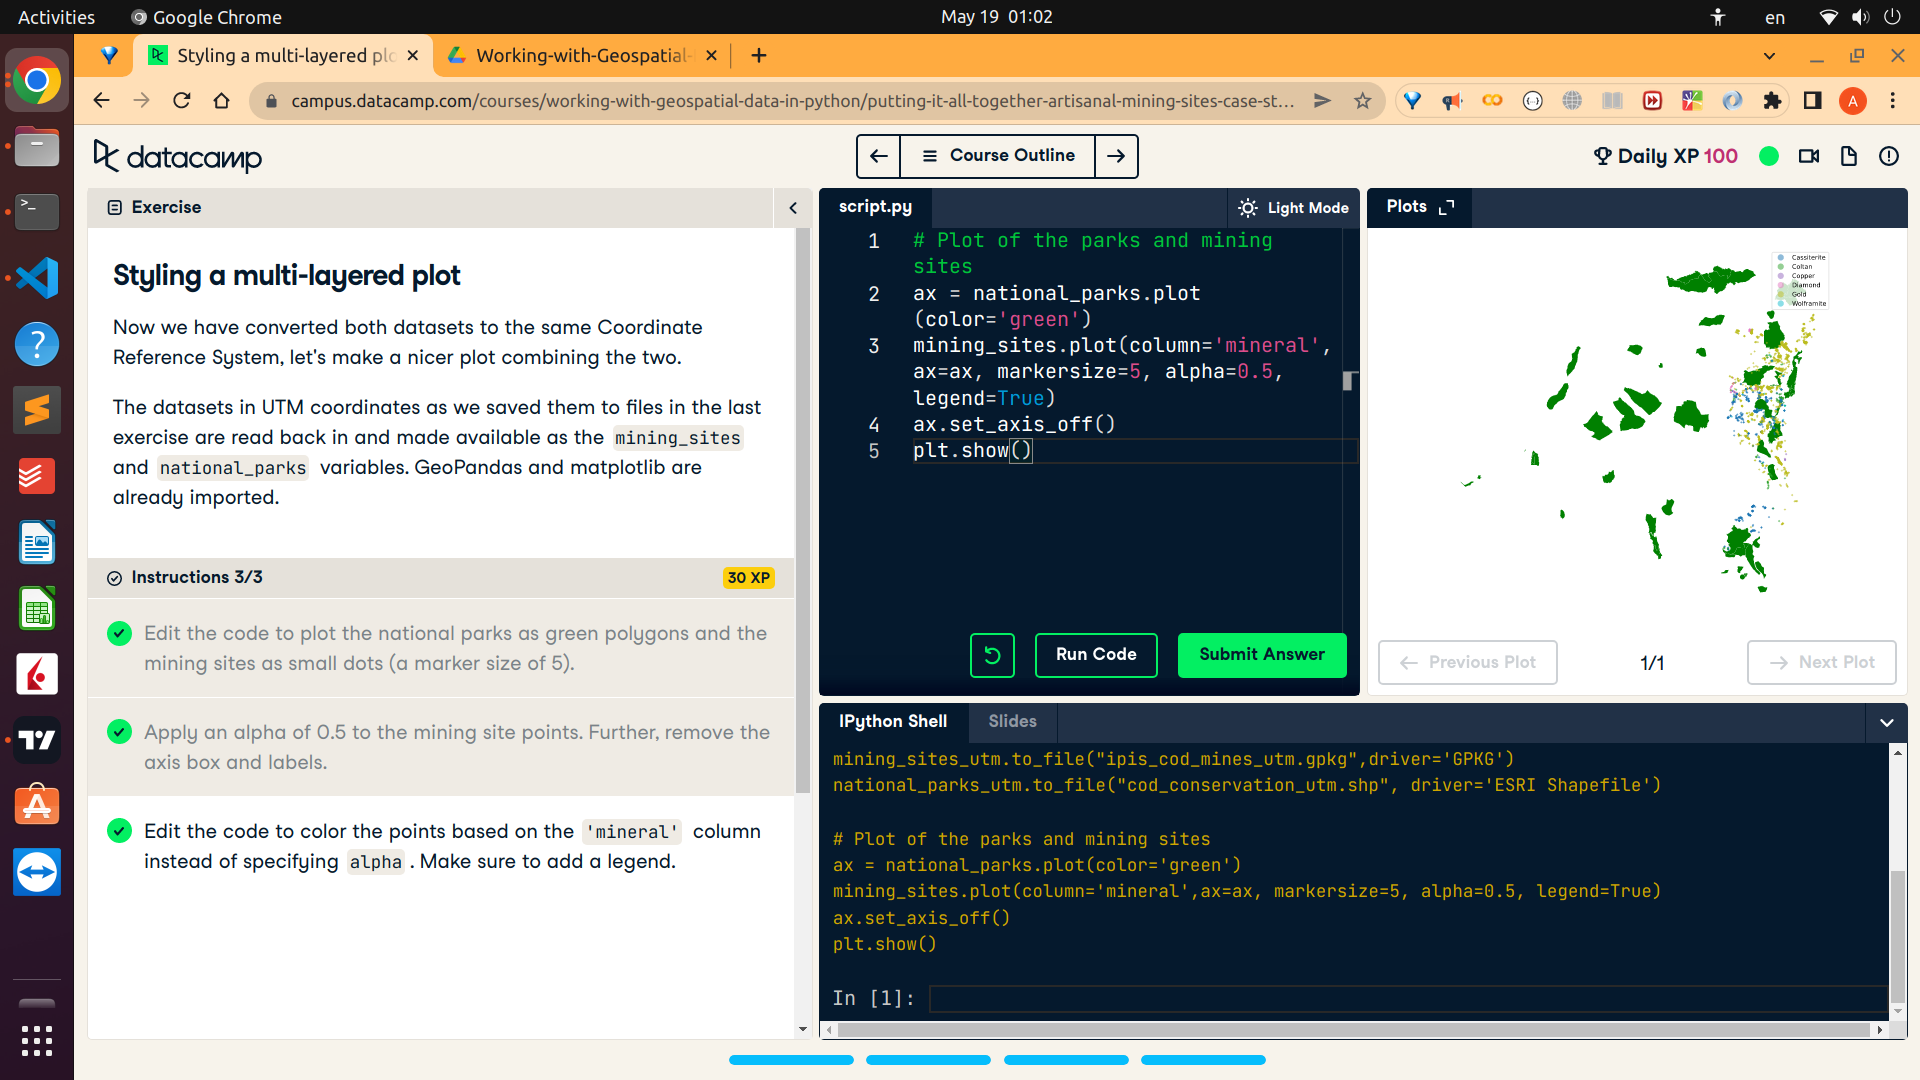

## 4.4. Additional spatial operations

Buffer around a point
Consider the city of Goma, the capital of the North Kivu province of Congo, close to the border with Rwanda. Its coordinates are 1.66°S 29.22°E (the `Point` is already provided in UTM coordinates as the `goma` variable).

How many mining sites are located within 50 km of Goma? And how much area of national park? Let's determine that using the buffer operation. Remember that distances should be expressed in the unit of the CRS (i.e. in meter in this case).

Note: if you have a boolean Series (for example as result of a spatial relationship method), then you can calculate how many `True` values (ie. how many geometries passed the check) by taking the sum of those booleans because in that case the `True` and `False` values will be seen as ones and zeros.

---

- Create a buffer of 50 km around `goma`, and assign it to a variable `goma_buffer`.

- Check which of the points of `mining_sites` are located within this buffer (and call this `mask`). Count those sites by taking the sum of the boolean `mask`, and print this result.

- Calculate the intersections of the national parks with the buffer. Take the sum of the area of those intersections, and print the result in km².

In [109]:
goma=Point(746989.5594829298, 9816380.942287602)

In [117]:
mining_sites=mining_sites.to_crs(epsg=32735)

In [118]:
# goma is a Point
print(type(goma))

# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

# The buffer is a polygon
print(type(goma_buffer))

# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print(mask.sum())

# Calculate the area of national park within the buffer
# print(national_parks.intersection(goma_buffer).area.sum() / (1000**2))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>
87




```
1566.4755910875376
```



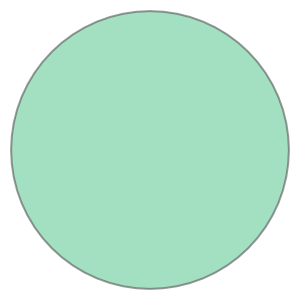

In [114]:
goma_buffer

## 4.5. Mining sites within national parks
For this exercise, let's start with one of the national parks, the Kahuzi-Biega National park (which was extracted from the national_parks dataset and is provided as the kahuzi variable).

Which of the mining sites are located within this national park?

And as a second step: can we determine all mining sites that are located within one of the national parks and in which park?

The mining sites (`mining_sites`) and national parks (`national_parks`) datasets are already loaded, and GeoPandas is already imported.


----

- Use the `within()` method to subset the mining sites (`mining_sites`) located in the kahuzi national park. Call the result `sites_kahuzi`.

- Determine for each of the mining sites if and in which national park it is located. This will create a GeoDataFrame similar to `mining_sites` but with an additional column with national park name. Call this result `sites_within_park`.

- Count the number of sites in each park by using the `value_counts()` method on the 'Name' column of `sites_within_park`.

In [ ]:
# # Extract the single polygon for the Kahuzi-Biega National park
# kahuzi = national_parks[national_parks['Name'] == "Kahuzi-Biega National park"].geometry.squeeze()

# # Take a subset of the mining sites located within Kahuzi
# sites_kahuzi = mining_sites[mining_sites.within(kahuzi)]
# print(sites_kahuzi)

# # Determine in which national park a mining site is located
# sites_within_park = geopandas.sjoin(mining_sites,national_parks, op='intersects', how='inner')
# print(sites_within_park.head())

# # The number of mining sites in each national park
# print(sites_within_park['Name'].value_counts())



```
# Output 1:

 visit_date                   name  n_workers      mineral                        geometry
661   2013-08-28Z          Ibozia/Kalumé       80.0  Cassiterite  POINT (567832.709 9759143.339)
662   2013-08-26Z                Matamba      150.0  Cassiterite  POINT (598323.539 9758688.142)
663   2013-08-27Z          Mutete/Mukina      170.0  Cassiterite  POINT (570733.437 9761871.114)
664   2013-08-28Z                 Mutete      100.0  Cassiterite  POINT (569881.093 9762219.111)
760   2014-02-25Z              Mazankala      120.0  Cassiterite  POINT (613075.533 9722956.980)
813   2015-07-28Z             Kitendebwa       50.0         Gold  POINT (693078.928 9770107.518)
869   2013-09-28Z           Sebwa-Lukoma      130.0  Cassiterite  POINT (660406.345 9715261.717)
870   2013-10-30Z              Rwamakaza      160.0  Cassiterite  POINT (661266.834 9716072.199)
1481  2009-01-01Z               Mugaba I       50.0         Gold  POINT (685167.371 9744069.967)
1482  2009-01-01Z           Mugaba Ouest       46.0         Gold  POINT (683156.687 9746324.416)
1676  2015-08-02Z  Nguba(Nkuba) kamisoke      122.0  Cassiterite  POINT (622151.349 9808363.111)
      visit_date          name  n_workers mineral                        geometry  index_right  \
253  2013-09-05Z  Kiviri/Tayna      244.0    Gold  POINT (709734.913 9961013.720)           23   
578  2015-09-02Z   Lubondozi 3       30.0    Gold  POINT (578464.315 9555456.293)           15   
579  2015-09-02Z        Katamu      180.0    Gold  POINT (576249.903 9554313.725)           15   
580  2015-09-02Z     Kimabwe 1      120.0    Gold  POINT (576425.777 9556329.634)           15   
581  2015-09-02Z   Lubondozi 1      300.0    Gold  POINT (579164.711 9554722.924)           15   

```





```
# Output 2:

 Type                       Name  
253  Nature Reserve       Tayna Nature Reserve  
578  Hunting Domain  Luama-Kivu Hunting Domain  
579  Hunting Domain  Luama-Kivu Hunting Domain  
580  Hunting Domain  Luama-Kivu Hunting Domain  
581  Hunting Domain  Luama-Kivu Hunting Domain  
```





```
# Output3:
Itombwe Nature Reserve          21
Luama-Katanga Hunting Domain    14
Kahuzi-Biega National park      11
Luama-Kivu Hunting Domain        9
Okapi Faunal Reserve             5
Maiko National park              3
Tayna Nature Reserve             1
Name: Name, dtype: int64
```



## 4.6. Applying custom spatial operations / Finding the name of the closest National Park

Let's start with a custom query for a single mining site. Here, we will determine the name of the national park that is the closest to the specific mining site.

The datasets on the mining sites (`mining_sites`) and national parks (`national_parks`) are already loaded.

---

- Select the first element of geometry and assign it to a variable called `single_mine`.

- Calculate the distance from each of the national parks to the `single_mine`. Call the result `dist`.

- Obtain the index for the minimum of `dist` with the `idxmin()1 method.

- Get the name of the closest national park using the obtained index with the `.loc[]` attribute, and print the result.

In [ ]:
# # Get the geometry of the first row
# single_mine = mining_sites.geometry[0]

# # Calculate the distance from each national park to this mine
# dist = national_parks.geometry.distance(single_mine)

# # The index of the minimal distance
# idx = dist.idxmin()

# # Access the name of the corresponding national park
# closest_park = national_parks.loc[idx, 'Name']
# print(closest_park)



```
# Output

Virunga National park
```



## 4.7. Applying a custom operation to each geometry
Now we know how to get the closest national park for a single point, let's do this for all points. For this, we are first going to write a function, taking a single point as argument and returning the desired result. Then we can use this function to apply it to all points.

The datasets on the mining sites (`mining_sites`) and national parks (`national_parks`) are already loaded. The single mining site from the previous exercises is already defined as `single_mine`.

---

- Create a function `closest_national_park()` that performs the analysis you did in the previous exercise: given a single point and all national parks, return the name of the closest national park.

- As a test, call this function on the single point (`single_mine`) and print the result. Is it the same as before ("Virunga National park")?

- Apply this function to all points of `mining_sites` and assign the result to a column called `'closest_park'`.

In [ ]:
# # Define a function that returns the closest national park
# def closest_national_park(geom, national_parks):
#     dist = national_parks.geometry.distance(geom)
#     idx = dist.idxmin()
#     closest_park = national_parks.loc[idx,'Name']
#     return closest_park

# # Call the function on single_mine
# print(closest_national_park(single_mine, national_parks))

# # Apply the function to all mining sites
# mining_sites['closest_park'] = mining_sites.geometry.apply(closest_national_park, national_parks=national_parks)
# print(mining_sites.head())



```
# Output 2:

Virunga National park
    visit_date                                name  n_workers mineral  \
0  2013-03-27Z                           Mayi-Tatu      150.0    Gold   
1  2013-03-27Z                             Mabanga      115.0    Gold   
2  2013-03-27Z                             Molende      130.0    Gold   
3  2013-03-27Z                          Embouchure      135.0    Gold   
4  2013-03-27Z  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                          geometry           closest_park  
0  POINT (796089.416 10111855.174)  Virunga National park  
1  POINT (795899.664 10110990.840)  Virunga National park  
2  POINT (795641.707 10109059.787)  Virunga National park  
3  POINT (794376.309 10110622.250)  Virunga National park  
4  POINT (796057.504 10105781.548)  Virunga National park
```



## 4.8. Working with raster data / Import and plot raster data

In this exercise, we are going to use a raster dataset of the vegetation types map (available from http://www.wri.org). The raster values take a set of discrete values indicating the type of vegetation. Let's start with reading the data and plotting it together with the mining site data.

The mining sites dataset (`mining_sites`) is already loaded, and GeoPandas and matplotlib are already imported.


---

- Import the rasterio package.

- Open the vegetation map geotiff file ("central_africa_vegetation_map_foraf.tif") and assign it to a variable src.

- Plot the raster dataset using the rasterio.plot.show() function and add the mining site locations in red and marker size of 1.


In [ ]:
# # Import the rasterio package
# import rasterio

# # Open the raster dataset
# src = rasterio.open("central_africa_vegetation_map_foraf.tif")

# # Import the plotting functionality of rasterio
# import rasterio.plot

# # Plot the raster layer with the mining sites
# ax = rasterio.plot.show(src)
# mining_sites.plot(ax=ax,color='red',markersize=1)
# plt.show()

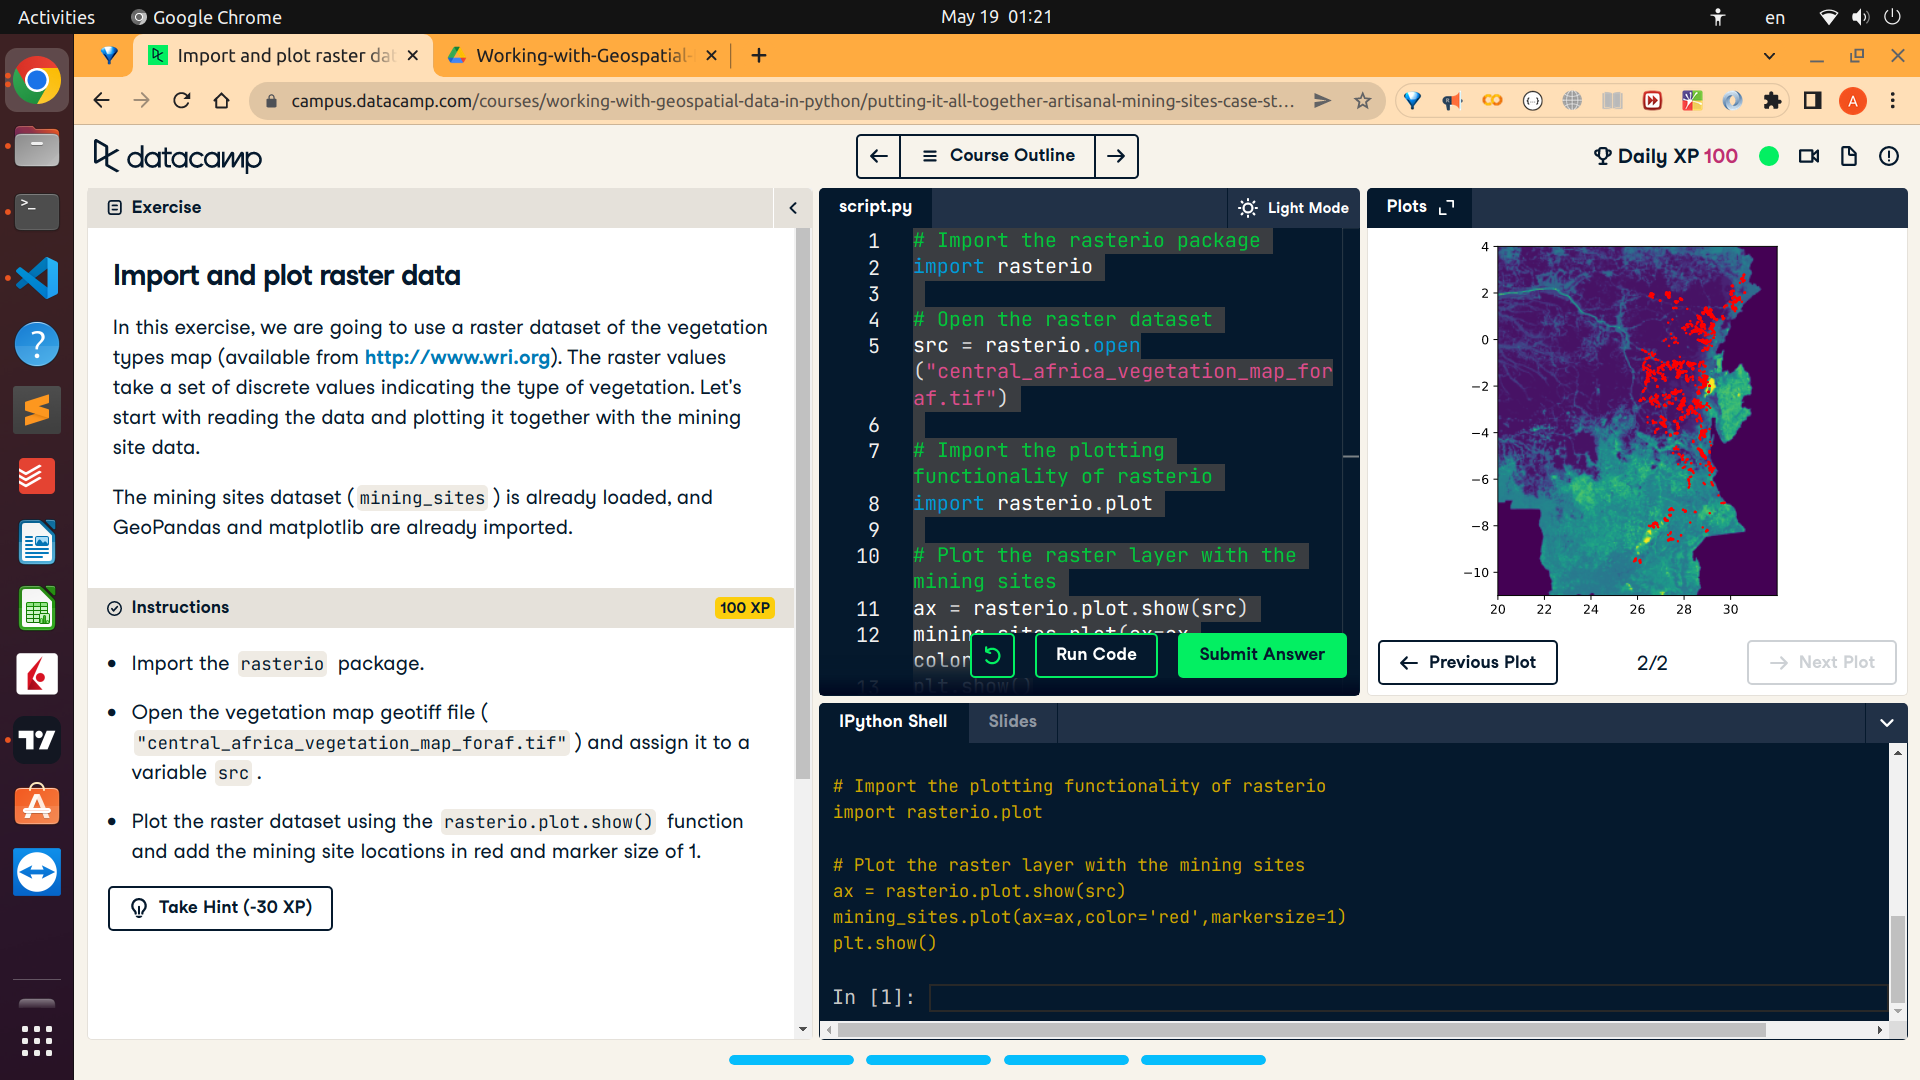

## 4.9. Extract information from raster layer

Let's now extract information from the raster layer, based on a vector file. This functionality is provided by the [rasterstats](https://github.com/perrygeo/python-rasterstats) package. 

Specifically for this exercise, we will determine the vegetation type at all mining sites, by getting the nearest raster pixel value at each point of the mining site dataset.

A subset of the mining sites dataset (`mining_sites`) is already loaded, and GeoPandas and matplotlib are already imported.

---

- Import the rasterstats package.

- Extract the nearest raster value for the mining site locations (`mining_sites`) using the `rasterstats.point_query()` function, and assign this to a new column `'vegetation'`.

- Make a plot of the mining site data using the `'vegetation'` column to color the points. Make sure to add a legend.



In [ ]:
# # Import the rasterstats package
# import rasterstats

# # Extract the nearest value in the raster for all mining sites
# vegetation_raster = "central_africa_vegetation_map_foraf.tif"
# mining_sites['vegetation'] = rasterstats.point_query(mining_sites.geometry, vegetation_raster, interpolate='nearest')
# print(mining_sites.head())

# # Replace numeric vegation types codes with description
# mining_sites['vegetation'] = mining_sites['vegetation'].replace(vegetation_types)

# # Make a plot indicating the vegetation type
# mining_sites.plot('vegetation',legend=True)
# plt.show()

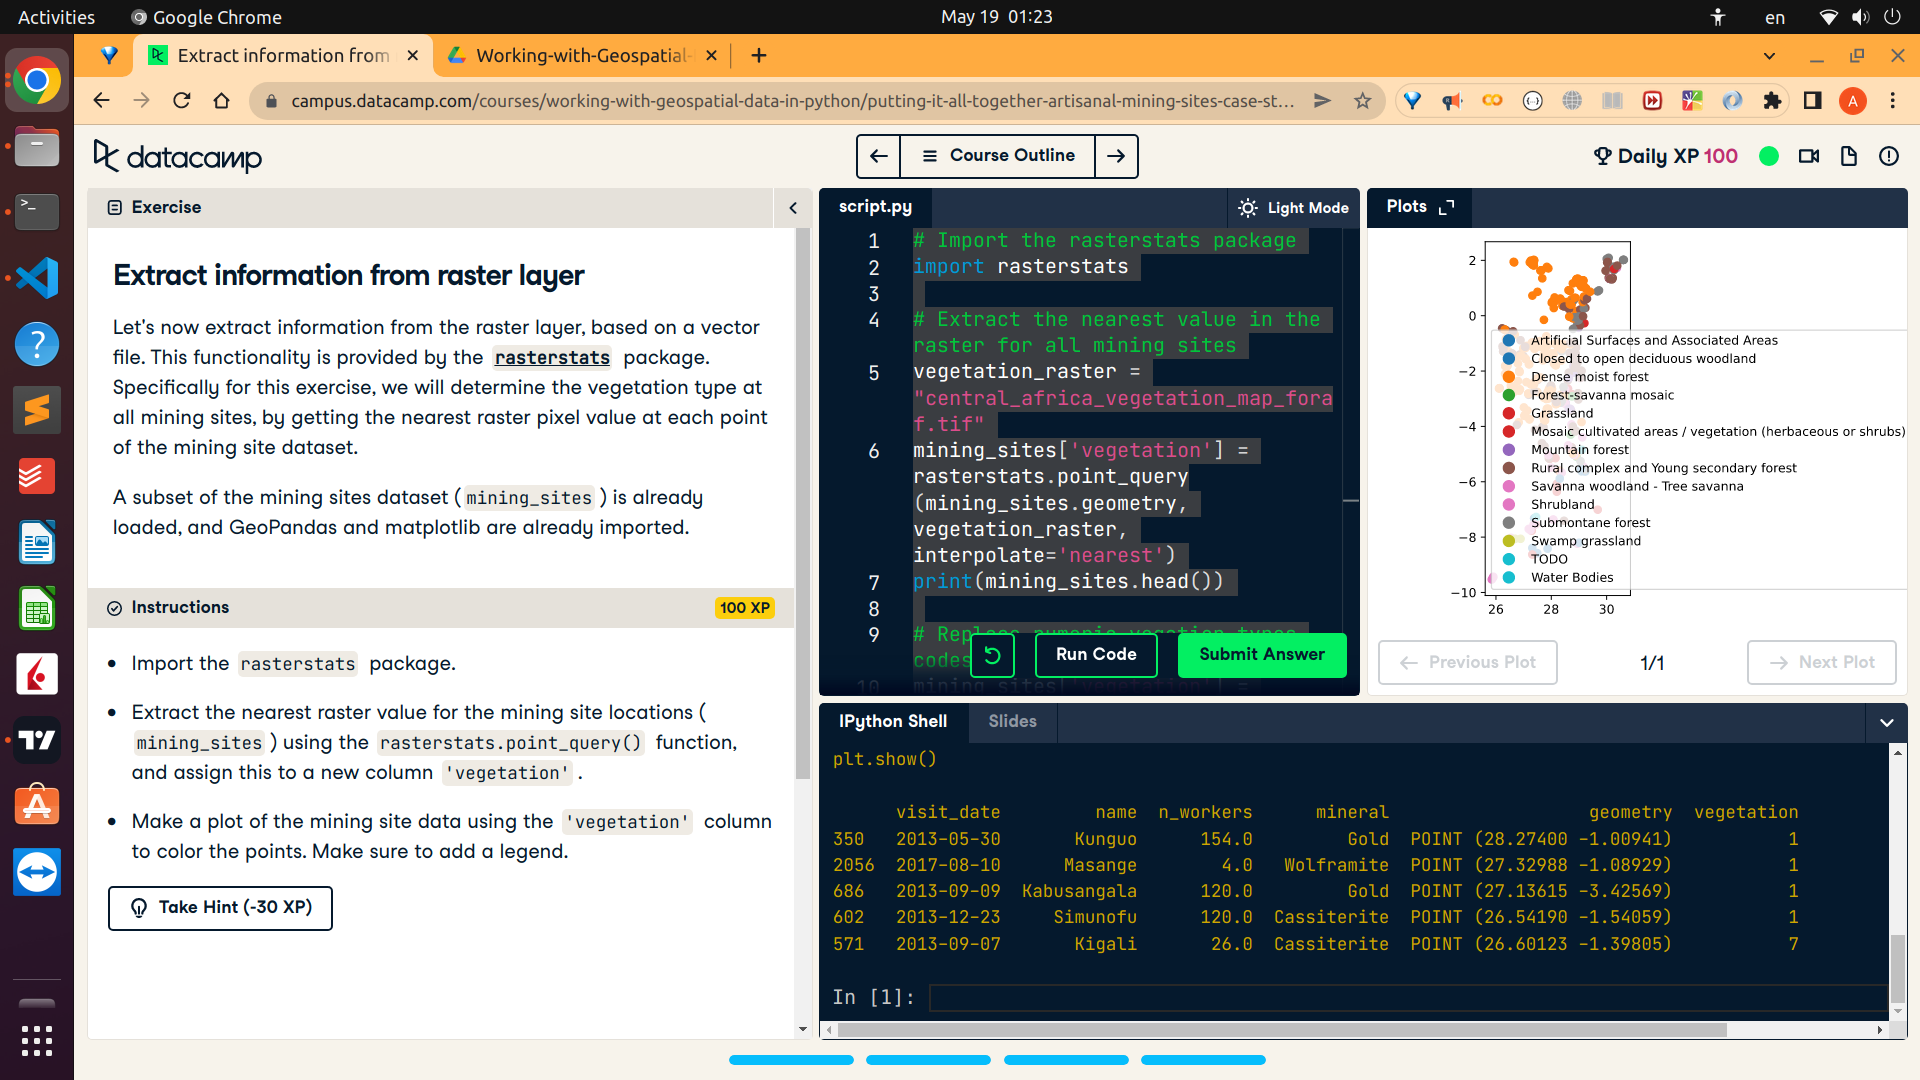